<a href="https://colab.research.google.com/github/Janainareisnascimento/KU-Data-Analytics/blob/main/Class_20_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tips on Using Colab**



*   Press the arrow within the black circle to execute a code cell.
*
```
# Anything that follows the '#' sign is a Python comment. The compiler will skip everything after # and go to the next line.
```
*
```
'''
This is a multiline comment in python
The compiler will skip everything in between the '''  ''' signs
'''
```
*  Double click to edit a text cell.
*  For a guide on Markdown, please see: https://colab.research.google.com/notebooks/markdown_guide.ipynb
* For a guide on Latex, please see: https://en.wikibooks.org/wiki/LaTeX/Mathematics

# **Install & Import**

The following cell needs to be executed every time your open the notebook, or if the notebook gets disconnected (happens if you leave it idle for a while).

Rerun the following cell if you receive the following error message:
```
ModuleNotFoundError: No module named 'pulp'
```
This indicates your notebook was disconnected from the server and Google has cleared everything that was stored in the remote computer's memory.


In [ ]:
# We will use pulp solver for solving LP problems.
# Details on the pulp solver can be found at: https://coin-or.github.io/pulp/
# The following line installs the pulp solver. pip is python's package management system.
# The '!' before pip is important

!pip install pulp

# Now that we have installed the solver, the following line imports it, i.e., makes it usable.

from pulp import *

# To perform sensitivity analysis, we will use the GLPK solver.
# Details about this solver can be found here: https://www.gnu.org/software/glpk/

!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 44.6 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpackin

# **Linear Programming**

## **Lawrence Hospital**

Lawrence Hospital is planning to install "sanitizing stations" with disinfecting wipes and hand sanitizer throughout their facility to reduce communicable infections among patients and staff. The facility estimates that without these stations, there can be 225 cases of ``exposure'' (people catching a new infection within the facility) in a week. Every box of  wipes (price \$30) and sanitizer (price \$20) the facility adds to sanitizing stations can reduce the number of exposures by 12 and 10 respectively.

The facility has a weekly budget of \$500 for the stations. Moreover, to ensure that wipes and sanitizers are always available for patient care, the facility has decided to allocate at most 15 boxes of each item, and at most 20 boxes of the two items combined in a week for the stations.

How many boxes of wipes, and sanitizer should the facility allocate for the sanitizing stations in a week to minimize the number exposures? (Suppose allocating a fraction of a box is allowed.)


### **Lawrence Hospital : Formulation**

**Decision Variables**:

1.   Boxes of disinfecting wipes: $x$
2.   Boxes of hand sanitizer: $y$

**Objective** : Minimize the number of exposure. Alternatively, maximize the number of cases prevented.

$$ \text{Maximize } 12x + 10y $$

**Constraints**:

1.   Max wipes:&emsp; $0\le x \le 15$
2.   Max sanitizer:&emsp; $0\le y \le 15$
3.   Max total quantity:&emsp; $x + y \le 20$
4.   Max budget:&emsp; $30x + 20y \le 500$




### **Lawrence Hospital : Solution**

In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Lawrence_Hospital",LpMaximize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# For this problem, you can set a upBound = 15 and ignore constraints "Max Wipes" and "Max Sanitizer".
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x=LpVariable("Wipes", lowBound = 0, upBound = None, cat='Continuous')
y=LpVariable("Sanitizer", lowBound = 0, upBound = None, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 12*x + 10*y, "Exposures_Prevented"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += x  <= 15, "Max_Wipes"
prob += y  <= 15, "Max_Sanitizer"
prob += x + y <= 20, "Order_Volume_Constraint"
prob += 30*x + 20*y <= 500, "Budget_Constraint"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

prob.writeLP("Lawrence_Hospital.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Lawrence_Hospital:
MAXIMIZE
10*Sanitizer + 12*Wipes + 0
SUBJECT TO
Max_Wipes: Wipes <= 15

Max_Sanitizer: Sanitizer <= 15

Order_Volume_Constraint: Sanitizer + Wipes <= 20

Budget_Constraint: 20 Sanitizer + 30 Wipes <= 500

VARIABLES
Sanitizer Continuous
Wipes Continuous

Status :  Optimal
Objective :  220.0
Variable :  Sanitizer  :  10.0
Variable :  Wipes  :  10.0
Constraint :  Max_Wipes  :  -5.0
Constraint :  Max_Sanitizer  :  -5.0
Constraint :  Order_Volume_Constraint  :  0.0
Constraint :  Budget_Constraint  :  0.0


## **Home Office Inc.**

Home Office Inc. specializes in manufacturing office chairs and couches. The production process for both chairs and couches consists of two stages:

(i) the Manufacturing team makes the product from raw materials;

(ii) the Packing team then conducts quality assurance, assembly, and packaging.

Each team has a 10 hour workday during which it works on both chairs and couches. The Manufacturing team takes 4 minutes to make a couch and 2.4 minutes to make a chair. The Packing team takes 3 minutes to process a couch and 3 minutes to process a chair. The company earns a net profit of \$100 on a couch and \$60 on a chair. How many chairs and couches should they produce during a workday to maximize daily net profit?

Assumptions:

(i) producing fractional units is allowed

(ii) there are always enough items for both teams to work on. Hence, the Packing team never has to wait for the Manufacturing team to complete its work.

Plot the feasible region and iso-objective lines using the following tool: https://www.desmos.com/calculator

### **Home Office Inc.: Formulation**

**Decision Variables**:

1.   Number of chairs to be produced in a day: $x$
2.   Number of couches to be produced in a day: $y$

**Objective**: Maximimize daily net profit
$$\text{Maximize } 60x+100y$$

**Constraints**:


1.   Total Time in Manufacturing Step:&emsp; $2.4x + 4y \le 600$
2.   Total Time in Packing Step:&emsp; $3x + 3y \le 600$
3.   Non-negativity:&emsp; $x,y \ge 0$

### **Home Office Inc.: Solution**

In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Home_Office",LpMaximize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# For this problem, you can set a upBound = 15 and ignore constraints "Max Wipes" and "Max Sanitizer".
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x=LpVariable("Chairs", lowBound = 0, upBound = None, cat='Continuous')
y=LpVariable("Couches", lowBound = 0, upBound = None, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 60*x + 100*y, "Profit"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += 2.4*x + 4*y <= 600, "Manufacturing"
prob += 3*x + 3*y <= 600, "Packing_time"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("Home_Office.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Home_Office:
MAXIMIZE
60*Chairs + 100*Couches + 0
SUBJECT TO
Manufacturing: 2.4 Chairs + 4 Couches <= 600

Packing_time: 3 Chairs + 3 Couches <= 600

VARIABLES
Chairs Continuous
Couches Continuous

Status :  Optimal
Objective :  15000.0
Variable :  Chairs  :  0.0
Variable :  Couches  :  150.0
Constraint :  Manufacturing  :  0.0
Constraint :  Packing_time  :  -150.0


## **GI Diet**

One of the first uses of LP was motivated by the US army's goal to minimize the cost of feeding GIs while still providing a healthy and nutritious diet during World War II.

Consider a simplified example of the same problem. There are four basic food groups each with a different calorie and nutrient content as shown below.

|  Food Group | Calories  | Nutrients (mg)  | Cost per serving (\$) |
|---|:---:|:---:|:---:|
| Grains  | 200  | 300  | 2 |
| Protein  | 300  | 250  | 2.5 |
| Veggies  | 100  | 500  | 3 |
| Dessert  | 400  | 50  | 1.5 |

A healthy diet must consist of between 2000 and 2500 calories (both inclusive) and between 1750 and 2250 mg (both inclusive) of nutrients in a day. Moreover, the number of daily servings of any particular food group should be at most 3. Formulate a LP to find the number of daily servings (could be fractional) of each food group that satisfy these requirements at the lowest cost.


### **GI Diet: Formulation**

**Decision Variables**

1.   Number of servings of grains: $x_g$
2.   Number of servings of protein: $x_p$
3.   Number of servings of veggies: $x_v$
4.   Number of servings of dessert: $x_d$

**Objective**: Minimize total cost of serving

$$\text{Minimize } 2x_g + 2.5x_p + 3x_v + 1.5x_d $$

**Constraints**:

1.   Number of servings should be between 0 and 3.

     (a) $0\le x_g \le3$\
     (b) $0\le x_p \le3$\
     (c) $0\le x_v \le3$\
     (d) $0\le x_d \le3$
2.   Calorie Requirement

     (a) $200x_g+300x_p+100x_v+400x_d \ge 2000$\
     (b) $200x_g+300x_p+100x_v+400x_d \le 2500$

3.   Nutritional Requirement

     (a) $300x_g+250x_p+500x_v+50x_d \ge 1750$\
     (b) $300x_g+250x_p+500x_v+50x_d \le 2250$

### **GI Diet: Solution**



In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("GI_Diet",LpMinimize)


# We next define the decision varibles.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x_g=LpVariable("Grains", lowBound = 0, upBound = 3, cat='Continuous')
x_p=LpVariable("Protein", lowBound = 0, upBound = 3, cat='Continuous')
x_v=LpVariable("Veggies", lowBound = 0, upBound = 3, cat='Continuous')
x_d=LpVariable("Dessert", lowBound = 0, upBound = 3, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 2*x_g + 2.5*x_p + 3*x_v + 1.5*x_d, "Cost"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += 200*x_g + 300*x_p + 100*x_v +400*x_d  >= 2000, "Calorie_Lower_Limit"
prob += 200*x_g + 300*x_p + 100*x_v +400*x_d  <= 2500, "Calorie_Upper_Limit"
prob += 300*x_g + 250*x_p + 500*x_v +50*x_d  >= 1750, "Nutrient_Lower_Limit"
prob += 300*x_g + 250*x_p + 500*x_v +50*x_d  <= 2250, "Nutrient_Upper_Limit"


# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

GI_Diet:
MINIMIZE
1.5*Dessert + 2*Grains + 2.5*Protein + 3*Veggies + 0.0
SUBJECT TO
Calorie_Lower_Limit: 400 Dessert + 200 Grains + 300 Protein + 100 Veggies
 >= 2000

Calorie_Upper_Limit: 400 Dessert + 200 Grains + 300 Protein + 100 Veggies
 <= 2500

Nutrient_Lower_Limit: 50 Dessert + 300 Grains + 250 Protein + 500 Veggies
 >= 1750

Nutrient_Upper_Limit: 50 Dessert + 300 Grains + 250 Protein + 500 Veggies
 <= 2250

VARIABLES
Dessert <= 3 Continuous
Grains <= 3 Continuous
Protein <= 3 Continuous
Veggies <= 3 Continuous

Status :  Optimal
Objective :  14.94
Variable :  Dessert  :  3.0
Variable :  Grains  :  3.0
Variable :  Protein  :  0.24
Variable :  Veggies  :  1.28
Constraint :  Calorie_Lower_Limit  :  0.0
Constraint :  Calorie_Upper_Limit  :  -500.0
Constraint :  Nutrient_Lower_Limit  :  0.0
Constraint :  Nutrient_Upper_Limit  :  -500.0


## **Copper Co.**

Copper Co. manufactures bronze and brass bars from copper ore and sells these bars to various industries. Copper ore is sold in 10 kg boxes and can be purchased for \$3 per box. Processing each box of ore requires 1 hour of factory time and yields 3 lb of regular bronze and 4 lb of regular brass. Regular Bronze can be sold for \$7/lb and regular brass for \$6/lb. (Prices of ingredients other than ore that are required to manufacture bronze or brass are negligible.)

Copper Co. also has the option of further processing regular bronze and regular brass to produce Grade A bronze, sold at \$18/lb, and Grade A brass, sold at \$14/lb, respectively. Each lb of regular bronze processed further requires an additional 3 hours of factory time and \$4 processing cost and yields 1 lb of Grade A bronze. Each lb of regular brass processed further requires an additional 2 hours of factory time and \$4 processing cost and yields 1 lb of Grade A brass. Each month, Copper Co. has 6,000 hours of factory time available and can purchase up to 4,000 boxes of copper ore from its suppliers. Formulate a
 LP that can be used to determine how much each product should Copper Co. manufacture to maximize monthly profits. Assume that the cost of the factory hours is a fixed cost and purchasing fractional number of boxes of ore is possible.

### **Copper Co.: Formulation**

**Decision Variables**

1.   Pounds of Regular Bronze: $x_{bz}$
2.   Pounds of Grade A Bronze: $x_{bzA}$
3.   Pounds of Regular Brass: $x_{bs}$
4.   Pounds of Grade A Brass: $x_{bsA}$
5.   *Boxes* of Copper Ore: $x_{ore}$

**Objective**: Maximize total profit

Note that:

*   Total Profit = Total Revenue - Total Cost
*   Total Revenue = $7x_{bz} + 6x_{bs} + 18x_{bzA} + 14x_{bsA}$
*   Total Cost = $4x_{bzA} + 4x_{bsA} + 3x_{ore}$



$$\text{Maximize } 7x_{bz} + 6x_{bs} + 14x_{bzA} + 10x_{bsA} - 3x_{ore}$$

**Constraints**:

1.   Ore Availability: $x_{ore} \le 4000$
2.   Time Availability: $x_{ore}+3x_{bzA}+2x_{bsA} \le 6000$
3.   Bronze Production: $x_{bz} + x_{bzA} = 3x_{ore}$
4.   Brass Production: $x_{bs} + x_{bsA} = 4x_{ore}$
5.   Non-negativity: $x_{bz},x_{bzA},x_{bs},x_{bsA},x_{ore} \ge 0$

### **Copper Co.: Solution**

In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Copper_Co",LpMaximize)


# We next define the decision varibles.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x_bz=LpVariable("Bronze", lowBound = 0, upBound = None, cat='Continuous')
x_bs=LpVariable("Brass", lowBound = 0, upBound = None, cat='Continuous')
x_bzA=LpVariable("Bronze_A", lowBound = 0, upBound = None, cat='Continuous')
x_bsA=LpVariable("Brass_A", lowBound = 0, upBound = None, cat='Continuous')
x_ore=LpVariable("Ore", lowBound = 0, upBound = 4000, cat='Continuous')

# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 7*x_bz + 6*x_bs + 14*x_bzA + 10*x_bsA - 3*x_ore, "Cost"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += x_ore + 3*x_bzA + 2*x_bsA  <= 6000, "Factory_Time"
prob += x_bz + x_bzA == 3*x_ore, "Bronze_Production"
prob += x_bs + x_bsA == 4*x_ore, "Brass_Production"


# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Copper_Co:
MAXIMIZE
6*Brass + 10*Brass_A + 7*Bronze + 14*Bronze_A + -3*Ore + 0
SUBJECT TO
Factory_Time: 2 Brass_A + 3 Bronze_A + Ore <= 6000

Bronze_Production: Bronze + Bronze_A - 3 Ore = 0

Brass_Production: Brass + Brass_A - 4 Ore = 0

VARIABLES
Brass Continuous
Brass_A Continuous
Bronze Continuous
Bronze_A Continuous
Ore <= 4000 Continuous

Status :  Optimal
Objective :  172666.66438
Variable :  Brass  :  16000.0
Variable :  Brass_A  :  0.0
Variable :  Bronze  :  11333.333
Variable :  Bronze_A  :  666.66667
Variable :  Ore  :  4000.0
Constraint :  Factory_Time  :  9.999999747378752e-06
Constraint :  Bronze_Production  :  -0.0003299999989394564
Constraint :  Brass_Production  :  0.0


## **Car Dealership**

A car dealership requires a different number of salespersons on each day of the week as shown in the table below.

| Day of Week  | # of Salespersons Required  |
|:---|:---:|
| Sunday | 16 |
| Monday  | 10  |
| Tuesday | 8  |
| Wednesday  | 8  |
| Thursday | 12 |
| Friday | 14 |
| Saturday| 18 |


Regulations require that each employee must work five consecutive days and then receive two days off. For example, an employee who works Monday to Friday must have Saturday and Sunday off, an employee who works from Tuesday to Saturday must have Sunday and Monday off, etc. Moreover, each salesperson is paid a daily flat wage of \$100 for working on a weekday and \$125 for working on a weekend. Formulate a LP that the dealership can use to minimize the total wage to be paid in a week. (Assume that number of employees can be fractional.)

### **Car Dealership: Formulation**

**Decision Variables**:

There are 7 possible shifts during a week and our decision variables are the number of salespersons in each shift.

| Shift | Number of Salesperson  | Weekly Wage  |
|:---|:---:|:---:|
| Sun - Thu  | $x_1$  | \$525 |
| Mon - Fri | $x_2$ | \$500 |
| Tue - Sat  | $x_3$  | \$525 |
| Wed - Sun  | $x_4$  | \$550 |
| Thu - Mon  | $x_5$ | \$550 |
| Fri - Tue  | $x_6$ | \$550 |
| Sat - Wed  | $x_7$ | \$550 |

**Objective**: Minimize total weekly wage.

$$ \text{Minimize } 525(x_1+x_3) + 500x_2 + 550(x_4 + x_5 + x_6 + x_7)$$

**Constraints**:

1. Daily Salesperson Requirement:\
   (a) Sun:&emsp; $x_1 + 0 + 0 + x_4 + x_5 + x_6 + x_7 \ge 16$ \
   (b) Mon:&emsp; $x_1 + x_2 + 0 + 0 + x_5 + x_6 + x_7 \ge 10$ \
   (c) Tue:&emsp; $x_1 + x_2 + x_3 + 0 + 0 + x_6 + x_7 \ge 8$ \
   (d) Wed:&emsp; $x_1 + x_2 + x_3 + x_4 + 0 + 0 + x_7 \ge 8$ \
   (e) Thu:&emsp; $x_1 + x_2 + x_3 + x_4 + x_5 + 0 + 0 \ge 12$ \
   (f) Fri:&emsp; $0 + x_2 + x_3 + x_4 + x_5 + x_6 + 0\ge 14$ \
   (g) Sat:&emsp; $0 + 0 + x_3 + x_4 + x_5 + x_6 + x_7 \ge 18$

2. Non-negativity: $x_1, x_2, x_3, x_4, x_5, x_6, x_7 \ge 0 $


### **Car Dealership: Solution**

In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Car_Dealership",LpMinimize)


# We next define the decision varibles.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x1=LpVariable("Sun-Thu", lowBound = 0, upBound = None, cat='Continuous')
x2=LpVariable("Mon-Fri", lowBound = 0, upBound = None, cat='Continuous')
x3=LpVariable("Tue-Sat", lowBound = 0, upBound = None, cat='Continuous')
x4=LpVariable("Wed-Sun", lowBound = 0, upBound = None, cat='Continuous')
x5=LpVariable("Thu-Mon", lowBound = 0, upBound = None, cat='Continuous')
x6=LpVariable("Fri-Tue", lowBound = 0, upBound = None, cat='Continuous')
x7=LpVariable("Sat-Wed", lowBound = 0, upBound = None, cat='Continuous')

# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 500*x2 + 525*(x1 + x3) + 550*(x4 + x5 + x6 + x7), "Weekly_Wage"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += x1 + x4 + x5 + x6 + x7  >= 16, "Sunday"
prob += x1 + x2 + x5 + x6 + x7  >= 10, "Monday"
prob += x1 + x2 + x3 + x6 + x7  >= 8, "Tuesday"
prob += x1 + x2 + x3 + x4 + x7  >= 8, "Wednesday"
prob += x1 + x2 + x3 + x4 + x5  >= 12, "Thursday"
prob += x2 + x3 + x4 + x5 + x6 >= 14, "Friday"
prob += x3 + x4 + x5 + x6 + x7 >= 18, "Saturday"



# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Car_Dealership:
MINIMIZE
550*Fri_Tue + 500*Mon_Fri + 550*Sat_Wed + 525*Sun_Thu + 550*Thu_Mon + 525*Tue_Sat + 550*Wed_Sun + 0
SUBJECT TO
Sunday: Fri_Tue + Sat_Wed + Sun_Thu + Thu_Mon + Wed_Sun >= 16

Monday: Fri_Tue + Mon_Fri + Sat_Wed + Sun_Thu + Thu_Mon >= 10

Tuesday: Fri_Tue + Mon_Fri + Sat_Wed + Sun_Thu + Tue_Sat >= 8

Wednesday: Mon_Fri + Sat_Wed + Sun_Thu + Tue_Sat + Wed_Sun >= 8

Thursday: Mon_Fri + Sun_Thu + Thu_Mon + Tue_Sat + Wed_Sun >= 12

Friday: Fri_Tue + Mon_Fri + Thu_Mon + Tue_Sat + Wed_Sun >= 14

Saturday: Fri_Tue + Sat_Wed + Thu_Mon + Tue_Sat + Wed_Sun >= 18

VARIABLES
Fri_Tue Continuous
Mon_Fri Continuous
Sat_Wed Continuous
Sun_Thu Continuous
Thu_Mon Continuous
Tue_Sat Continuous
Wed_Sun Continuous

Status :  Optimal
Objective :  9850.0
Variable :  Fri_Tue  :  2.0
Variable :  Mon_Fri  :  0.0
Variable :  Sat_Wed  :  4.0
Variable :  Sun_Thu  :  0.0
Variable :  Thu_Mon  :  8.0
Variable :  Tue_Sat  :  2.0
Variable :  Wed_Sun  :  2.0
Constraint :  Sunday  :  0.0
Constraint

## **Phone Manufacturing**

Orange Computers produces three smartphones models "Regular", "Pro", and "ProXL", which differ in their screensizes. The manufacturing process starts by purchasing printed circuit boards of width 6 in. and length 20 in. from a supplier and cutting them into different sizes for the three models.

The "Regular" model requires a circuit board of width 6 in. and length 7 in., while the dimensions required for the "Pro" and "ProXL" models are 6in.$\times$8in. and 6in.$\times$9in., respectively. After cutting, any leftover circuit boards whose dimensions do not fit any of the three model are discarded.

Orange Computers expects the following demand for the three models:

| Model | Demand (in 1000s of units)  |
|:---|:---:|
| Regular  | 1000  |
| Pro  | 700  |
| ProXL  | 800  |

What is the minimum number of printed circuit boards (can be fractional) that Orange computers should order from the supplier to meet this demand?

### **Phone Manufacturing: Formulation**

Observe that we can cut a 6in.$\times$20in. circuit board lengthwise in a few different ways to obtain the three required sizes. For example, we can cut two regular sizes (6in.$\times$7in.) and discard the remaining 6in.$\times$6in. Denote this cutting configuration as R=2, P=0, X=0. Similarly, we can list the other possible configurations.


**Decision variables:**

The number of supplier provided circuit boards cut as per each configuration.


| Configuration | Number of Boards  |
|:---|:---:|
| R=2, P=0, X=0  | $x_1$  |
| R=0, P=2, X=0 | $x_2$ |
| R=0, P=0, X=2  | $x_3$  |
| R=1, P=1, X=0  | $x_4$  |
| R=1, P=0, X=1  | $x_5$ |
| R=0, P=1, X=1  | $x_6$ |

**Objective**
Minimize the number of circuit boards required.

$$\text{Minimize } x_1+x_2+x_3+x_4+x_5+x_6$$

**Constraints**


1.   Demand for Regular:&emsp; $2x_1+x_4+x_5 \ge 1000$
2.   Demand for Pro:&emsp; $2x_2+x_4+x_6 \ge 700$
3.   Demand for ProXL:&emsp; $2x_3+x_5+x_6 \ge 800$
4.   Non-negativity:&emsp; $x_1,x_2,x_3,x_4,x_5,x_6 \ge 0$







### **Phone Manufacturing: Solution**

In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Phone_Manufacturing",LpMinimize)


# We next define the decision varibles.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x1=LpVariable("R2_P0_X0", lowBound = 0, upBound = None, cat='Continuous')
x2=LpVariable("R0_P2_X0", lowBound = 0, upBound = None, cat='Continuous')
x3=LpVariable("R0_P0_X2", lowBound = 0, upBound = None, cat='Continuous')
x4=LpVariable("R1_P1_X0", lowBound = 0, upBound = None, cat='Continuous')
x5=LpVariable("R1_P0_X1", lowBound = 0, upBound = None, cat='Continuous')
x6=LpVariable("R0_P1_X1", lowBound = 0, upBound = None, cat='Continuous')

# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += x1 + x2 + x3 + x4 + x5 + x6, "Total_Boards"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += 2*x1 + x4 + x5 >= 1000, "Regular"
prob += 2*x2 + x4 + x6 >= 700, "Pro"
prob += 2*x3 + x5 + x6 >= 800, "XL"




# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Phone_Manufacturing:
MINIMIZE
1*R0_P0_X2 + 1*R0_P1_X1 + 1*R0_P2_X0 + 1*R1_P0_X1 + 1*R1_P1_X0 + 1*R2_P0_X0 + 0
SUBJECT TO
Regular: R1_P0_X1 + R1_P1_X0 + 2 R2_P0_X0 >= 1000

Pro: R0_P1_X1 + 2 R0_P2_X0 + R1_P1_X0 >= 700

XL: 2 R0_P0_X2 + R0_P1_X1 + R1_P0_X1 >= 800

VARIABLES
R0_P0_X2 Continuous
R0_P1_X1 Continuous
R0_P2_X0 Continuous
R1_P0_X1 Continuous
R1_P1_X0 Continuous
R2_P0_X0 Continuous

Status :  Optimal
Objective :  1250.0
Variable :  R0_P0_X2  :  400.0
Variable :  R0_P1_X1  :  0.0
Variable :  R0_P2_X0  :  350.0
Variable :  R1_P0_X1  :  0.0
Variable :  R1_P1_X0  :  0.0
Variable :  R2_P0_X0  :  500.0
Constraint :  Regular  :  0.0
Constraint :  Pro  :  0.0
Constraint :  XL  :  0.0


## **Inventory Problem**

A car dealership expects that the demand for a particular model of a car in each quarter of the year would be as follows:

| Quarter  | Demand  |
|:---|:---:|
| 1 | 125 |
| 2  | 150  |
| 3 | 200  |
| 4  | 175  |

The dealership can order cars from the manufacturer at most twice in a quarter. In the first order, known as the *regular* order, the manufacturer ships the cars to the dealership at a reduced price of \$100 per car. However, to be able to satisfy demand from all dealerships in the country, the manufacturer limits the regular orders to at most 150 cars per dealership. The dealership can place a second *special* order in which there is no quantity limit but the shipping cost is \$175 per car. The dealership also incurs a *holding cost* of \$25 per quarter on any unsold car (the holding includes depreciation in value, cost of money invested, cost of renting physical space, etc.).

Formulate an LP to find an ordering policy (i.e., # of cars under regular and special orders in each quarter) that minimizes the dealership's total cost in satisfying the demand. Assume that the dealership had no cars of the particular model on hand at the beginning of the year and fractional ordering is possible.

### **Inventory Problem: Formulation**

**Decision variables**:

(a)  Regular orders:&emsp; $x_1, x_2, x_3, x_4$ \
(b)  Special orders:&emsp; $y_1, y_2, y_3, y_4$\
(c)  Left-over inventory in every quarter:&emsp; $z_1, z_2, z_3, z_4$

<br></br>

**Objective**: Minimize the sum of ordering cost and holding cost

$$\text{Minimize } 100(x_1+x_2+x_3+x_4) + 175(y_1+y_2+y_3+y_4) + 25(z_1+z_2+z_3+z_4) $$

<br></br>

**Constraints**:

1.  Regular order limit: &emsp; $x_1,x_2,x_3,x_4 \le 150$


2.  Inventory balance constraints:\
(a) $z_1 = 0 + x_1 + y_1 - 125 $ \
(b) $z_2 = z_1 + x_2 + y_2 - 150 $ \
(c) $z_3 = z_2 + x_3 + y_3 - 200 $ \
(d) $z_4 = z_3 + x_4 + y_4 - 175 $


3.  Non-negativity: &emsp;

 $x_1,x_2,x_3,x_4,y_1,y_2,y_3,y_4,z_1,z_2,z_3,z_4 \ge 0$

### **Inventory Problem: Solution**

In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Inventory_Problem",LpMinimize)


# We next define the decision varibles.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x1=LpVariable("Reg-1", lowBound = 0, upBound = 150, cat='Continuous')
x2=LpVariable("Reg-2", lowBound = 0, upBound = 150, cat='Continuous')
x3=LpVariable("Reg-3", lowBound = 0, upBound = 150, cat='Continuous')
x4=LpVariable("Reg-4", lowBound = 0, upBound = 150, cat='Continuous')

y1=LpVariable("Spl-1", lowBound = 0, upBound = None, cat='Continuous')
y2=LpVariable("Spl-2", lowBound = 0, upBound = None, cat='Continuous')
y3=LpVariable("Spl-3", lowBound = 0, upBound = None, cat='Continuous')
y4=LpVariable("Spl-4", lowBound = 0, upBound = None, cat='Continuous')

z1=LpVariable("Inv-1", lowBound = 0, upBound = None, cat='Continuous')
z2=LpVariable("Inv-2", lowBound = 0, upBound = None, cat='Continuous')
z3=LpVariable("Inv-3", lowBound = 0, upBound = None, cat='Continuous')
z4=LpVariable("Inv-4", lowBound = 0, upBound = None, cat='Continuous')

# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 100*(x1+x2+x3+x4) + 175*(y1+y2+y3+y4) + 25*(z1+z2+z3+z4), "Total_Cost"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += z1 == 0 +  x1 + y1 - 125, "Qrt-1"
prob += z2 == z1 + x2 + y2 - 150, "Qrt-2"
prob += z3 == z2 + x3 + y3 - 200, "Qrt-3"
prob += z4 == z3 + x4 + y4 - 175, "Qrt-4"




# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Inventory_Problem:
MINIMIZE
25*Inv_1 + 25*Inv_2 + 25*Inv_3 + 25*Inv_4 + 100*Reg_1 + 100*Reg_2 + 100*Reg_3 + 100*Reg_4 + 175*Spl_1 + 175*Spl_2 + 175*Spl_3 + 175*Spl_4 + 0
SUBJECT TO
Qrt_1: Inv_1 - Reg_1 - Spl_1 = -125

Qrt_2: - Inv_1 + Inv_2 - Reg_2 - Spl_2 = -150

Qrt_3: - Inv_2 + Inv_3 - Reg_3 - Spl_3 = -200

Qrt_4: - Inv_3 + Inv_4 - Reg_4 - Spl_4 = -175

VARIABLES
Inv_1 Continuous
Inv_2 Continuous
Inv_3 Continuous
Inv_4 Continuous
Reg_1 <= 150 Continuous
Reg_2 <= 150 Continuous
Reg_3 <= 150 Continuous
Reg_4 <= 150 Continuous
Spl_1 Continuous
Spl_2 Continuous
Spl_3 Continuous
Spl_4 Continuous

Status :  Optimal
Objective :  70000.0
Variable :  Inv_1  :  25.0
Variable :  Inv_2  :  25.0
Variable :  Inv_3  :  0.0
Variable :  Inv_4  :  0.0
Variable :  Reg_1  :  150.0
Variable :  Reg_2  :  150.0
Variable :  Reg_3  :  150.0
Variable :  Reg_4  :  150.0
Variable :  Spl_1  :  0.0
Variable :  Spl_2  :  0.0
Variable :  Spl_3  :  25.0
Variable :  Spl_4  :  25.0
Constraint :  Qrt_1  :  0.0
Constra

## **Investment Problem**

RealWealth LLC, a real estate investment company, has \$1 million to invest in Year 1 and is aiming to maximize this sum in Year 4. They are considering investing in a few of the following projects with different start, end, and payout times as shown below:

| Project | Year 1 | Year 2 | Year 3 | Year 4 |
|:---:|:---:|:---:|:---:|:---:|
| A  | -1  | 0.5 | 1 |  |
| B  |   | -1 | 0.5 | 1 |
| C  | -1  | 1.2 |  |  |
| D  | -1  |  |  | 1.9 |
| E  |  |  | -1 | 1.5 |

This table can be read as follows: If you invest \$1 in project A in Year 1 (indicated by -1), you would get a payout of \$0.5 in Year 2, and another payout of \$1 in Year 3. It is not possible to invest in project B in Year 1 (as indicated by the blank), but if you invest \$1 in this project in Year 2, you would receive \$0.5 in Year 3, and \$1 in Year 4.

RealWealth LLC can also invest in the money market at a rate of 8% per year; e.g., if they invest \$1 in the money market in Year 1, they receive \$1.08 in Year 2. Moreover, the money recieved from a project can be reinvested into another project or in the money market. For example, the money received from project A in Year 2 can be reinvested in project B or in the money market that year.

Formulate an LP to help RealWealth LLC device an investment strategy. Assume that there are no limits on how much of the \$1 million can be invested into a project.

### **Investment Problem: Formulation**

**Decision variables**:

(a)  Amount Invested in Projects:&emsp; $x_A, x_B, x_C, x_D, x_E$ \
(b)  Amount Invested in the Money Market in years 1, 2, and 3:&emsp; $x_{1}, x_{2}, x_{3}$


<br></br>

**Objective**: Maximize the sum of money in Year 4

$$\text{Maximize } x_B + 1.9 x_D + 1.5 x_E + 1.08 x_{3} $$

<br></br>

**Constraints**:

1.  In each year, Money invested = Money received:\
(a) Year 1:&emsp; $x_A + x_C + x_D + x_{1} = 1,000,000 $ \
(b) Year 2:&emsp; $x_B + x_{2} = 0.5x_A + 1.2x_C + 1.08x_{1}$ \
(c) Year 3:&emsp; $x_E + x_{3} = x_A + 0.5x_B + 1.08x_{2}$


2.  Non-negativity: &emsp;

 $x_A, x_B, x_C, x_D, x_E, x_{1}, x_{2}, x_{3} \ge 0$

### **Investment Problem: Solution**

In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Investment_Problem",LpMaximize)


# We next define the decision varibles.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


xA=LpVariable("Prj-A", lowBound = 0, upBound = None, cat='Continuous')
xB=LpVariable("Prj-B", lowBound = 0, upBound = None, cat='Continuous')
xC=LpVariable("Prj-C", lowBound = 0, upBound = None, cat='Continuous')
xD=LpVariable("Prj-D", lowBound = 0, upBound = None, cat='Continuous')
xE=LpVariable("Prj-E", lowBound = 0, upBound = None, cat='Continuous')

x1=LpVariable("MM-1", lowBound = 0, upBound = None, cat='Continuous')
x2=LpVariable("MM-2", lowBound = 0, upBound = None, cat='Continuous')
x3=LpVariable("MM-3", lowBound = 0, upBound = None, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += xB + 1.9*xD + 1.5*xE + 1.08*x3, "Total_Cost"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += 1e+6 == xA + xC + xD + x1, "Year-1"
prob += 0.5*xA + 1.2*xC + 1.08*x1 == xB + x2, "Year-2"
prob += xA + 0.5*xB + 1.08*x2 == xE + x3, "Year-3"




# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Investment_Problem:
MAXIMIZE
1.08*MM_3 + 1*Prj_B + 1.9*Prj_D + 1.5*Prj_E + 0.0
SUBJECT TO
Year_1: MM_1 + Prj_A + Prj_C + Prj_D = 1000000

Year_2: 1.08 MM_1 - MM_2 + 0.5 Prj_A - Prj_B + 1.2 Prj_C = 0

Year_3: 1.08 MM_2 - MM_3 + Prj_A + 0.5 Prj_B - Prj_E = 0

VARIABLES
MM_1 Continuous
MM_2 Continuous
MM_3 Continuous
Prj_A Continuous
Prj_B Continuous
Prj_C Continuous
Prj_D Continuous
Prj_E Continuous

Status :  Optimal
Objective :  2375000.0
Variable :  MM_1  :  0.0
Variable :  MM_2  :  0.0
Variable :  MM_3  :  0.0
Variable :  Prj_A  :  1000000.0
Variable :  Prj_B  :  500000.0
Variable :  Prj_C  :  0.0
Variable :  Prj_D  :  0.0
Variable :  Prj_E  :  1250000.0
Constraint :  Year_1  :  0.0
Constraint :  Year_2  :  0.0
Constraint :  Year_3  :  0.0


## **Data Envelopment Analysis**

To help fight Covid-19, the UN has sent monetary aid and PPE to the three worst affected countries in the Middle East. The following table shows the amount of money (in millions of dollars) and the number of PPE (in millions) provided to each country, and the number of people (in millions) from different age groups who have recovered since the aid was sent.

| Country | Monetary Aid<br> (in millions of \$) | PPE (in millions) | Millions of Recovered<br> patients in age group 0 - 20 | Millions of Recovered<br> patients in age group 21 - 60 | Millions of Recovered<br> patients in age group 61+ |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 1  | 5 | 14 | 9 | 4 | 16 |
| 2  | 8 | 15 | 5 | 7 | 10 |
| 3  | 7 | 12 | 4 | 9 | 13 |

Assume that the all the countries were in a very similar state in terms of percentage of population affected by Covid-19 before the aid was sent.

Use lp to calculate which country has used the aid most efficiently.


### **Data Envelopment Analysis: Formulation**

We need to rank the efficiencies of these 3 countries; that is, calculate their **relative efficiencies**. To do this, we can decide the per unit benefit associated with each output and the per unit cost associated with each input. Our goals are as follows:


*   We will find the most charitable values of the per-unit benefits and per-unit costs for each country. It is fine for each country to excel along different dimensions. Therefore, each country can have different values for the per unit benefits and costs.
*   Efficiency can never exceed 1.
*   No costs or benefits should be ignored. All costs and benefits must be *strictly* positive.
*   We will scale down the total costs of all inputs to 1, so that the total benefits = efficiency of the country.


To satisfy the above goals, we can formulate the following lp for each country.

**Decision Variables** :

1.   The benefit of each output: $b_1$, $b_2$, $b_3$.

The index refers to index of the benefit columns. So, $b_1$ refers to the benefit associated with each patient in the age group 0 - 20 recovering from Covid.

2.   The cost of each input: $c_1$, $c_2$.

The index refers to index of the cost columns. So, $c_1$ refers to the cost of the monetary aid.

Note that although $b_i$ and $c_i$ will be decision variables in the lp for each country, their optimal values might be different in each lp. The idea is that each country might evaluate the costs and benefits differently. Remember, we are only interested in relative efficiences. We want to create an outer envelope.

**Country 1** : The lp for country 1 is as follows:
<br></br>


**Objective** : Maximize total benefits. $$\text{Maximize } 9b_1 + 4b_2 + 16b_3$$

**Constraints**:


1.   For each country, the costs must be weakly higher than benefits, so that the efficiency does not exceed 1.\
  (i)  Country 1: &emsp; $9b_1 + 4b_2 + 16b_3 \le 5c_1 + 14c_2$\
  (ii) Country 2: &emsp; $5b_1 + 7b_2 + 10b_3 \le 8c_1 + 15c_2$\
  (Iii) Country 3: &emsp; $4b_1 + 9b_2 + 13b_3 \le 7c_1 + 12c_2$
2.   Total Cost for country 1 is normalized (scaled) to 1: &emsp; $5c_1 + 14c_2 = 1$
3. All costs and benefits should be *strictly* positive:  &emsp; $b_1, b_2, b_3, c_1, c_2 \ge 0.001$

The RHS value of 0.001 in the above constraint is arbitrary. Any small value will work.

<br></br>

**Country 2** : The lp for country 2 is as follows:
<br></br>


**Objective** : Maximize total benefits. $$\text{Maximize } 5b_1 + 7b_2 + 10b_3$$

**Constraints**:


1.   For each country, the costs must be weakly higher than benefits, so that the efficiency does not exceed 1.\
  (i)  Country 1: &emsp; $9b_1 + 4b_2 + 16b_3 \le 5c_1 + 14c_2$\
  (ii) Country 2: &emsp; $5b_1 + 7b_2 + 10b_3 \le 8c_1 + 15c_2$\
  (Iii) Country 3: &emsp; $4b_1 + 9b_2 + 13b_3 \le 7c_1 + 12c_2$
2.   Total Cost for country 2 is normalized (scaled) to 1: &emsp; $8c_1 + 15c_2 = 1$
3. All costs and benefits should be *strictly* positive:  &emsp; $b_1, b_2, b_3, c_1, c_2 \ge 0.001$

The RHS value of 0.001 in the above constraint is arbitrary. Any small value will work.

<br></br>

**Country 3** : The lp for country 3 is as follows:
<br></br>


**Objective** : Maximize total benefits. $$\text{Maximize } 4b_1 + 9b_2 + 13b_3$$

**Constraints**:


1.   For each country, the costs must be weakly higher than benefits, so that the efficiency does not exceed 1.\
  (i)  Country 1: &emsp; $9b_1 + 4b_2 + 16b_3 \le 5c_1 + 14c_2$\
  (ii) Country 2: &emsp; $5b_1 + 7b_2 + 10b_3 \le 8c_1 + 15c_2$\
  (Iii) Country 3: &emsp; $4b_1 + 9b_2 + 13b_3 \le 7c_1 + 12c_2$
2.   Total Cost for country 3 is normalized (scaled) to 1: &emsp; $7c_1 + 12c_2 = 1$
3. All costs and benefits should be *strictly* positive:  &emsp; $b_1, b_2, b_3, c_1, c_2 \ge 0.001$

The RHS value of 0.001 in the above constraint is arbitrary. Any small value will work.

<br></br>

**If we solve these lp, we will find that efficiencies of countries 1 and 3 are 1, while country 2's efficiency is 0.773.**


### **Data Envelopement Analysis: Solution --- Country 1**

In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("DEA_Country_1",LpMaximize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

b1 = LpVariable("benefit_1", lowBound = 0.001, upBound = None, cat='Continuous')
b2 = LpVariable("benefit_2", lowBound = 0.001, upBound = None, cat='Continuous')
b3 = LpVariable("benefit_3", lowBound = 0.001, upBound = None, cat='Continuous')
c1 = LpVariable("cost_1", lowBound = 0.001, upBound = None, cat='Continuous')
c2 = LpVariable("cost_2", lowBound = 0.001, upBound = None, cat='Continuous')

# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 9*b1 + 4*b2 + 16*b3, "Total_benefit"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.

prob += 9*b1 + 4*b2 + 16*b3 <= 5*c1 + 14*c2, "Efficiency1"
prob += 5*b1 + 7*b2 + 10*b3 <= 8*c1 + 15*c2, "Efficiency2"
prob += 4*b1 + 9*b2 + 13*b3 <= 7*c1 + 12*c2, "Efficiency3"
prob += 5*c1 + 14*c2 == 1, "Scaled_Cost"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("DEA_Country_1.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

DEA_Country_1:
MAXIMIZE
9*benefit_1 + 4*benefit_2 + 16*benefit_3 + 0
SUBJECT TO
Efficiency1: 9 benefit_1 + 4 benefit_2 + 16 benefit_3 - 5 cost_1 - 14 cost_2
 <= 0

Efficiency2: 5 benefit_1 + 7 benefit_2 + 10 benefit_3 - 8 cost_1 - 15 cost_2
 <= 0

Efficiency3: 4 benefit_1 + 9 benefit_2 + 13 benefit_3 - 7 cost_1 - 12 cost_2
 <= 0

Scaled_Cost: 5 cost_1 + 14 cost_2 = 1

VARIABLES
0.001 <= benefit_1 Continuous
0.001 <= benefit_2 Continuous
0.001 <= benefit_3 Continuous
0.001 <= cost_1 Continuous
0.001 <= cost_2 Continuous

Status :  Optimal
Objective :  1.00000001
Variable :  benefit_1  :  0.10888889
Variable :  benefit_2  :  0.001
Variable :  benefit_3  :  0.001
Variable :  cost_1  :  0.1972
Variable :  cost_2  :  0.001
Constraint :  Efficiency1  :  9.999999951368355e-09
Constraint :  Efficiency2  :  -1.0311555499999998
Constraint :  Efficiency3  :  -0.9348444399999998
Constraint :  Scaled_Cost  :  -1.214306433183765e-17


### **Data Envelopement Analysis: Solution --- Country 2**

In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("DEA_Country_2",LpMaximize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

b1 = LpVariable("benefit_1", lowBound = 0.001, upBound = None, cat='Continuous')
b2 = LpVariable("benefit_2", lowBound = 0.001, upBound = None, cat='Continuous')
b3 = LpVariable("benefit_3", lowBound = 0.001, upBound = None, cat='Continuous')
c1 = LpVariable("cost_1", lowBound = 0.001, upBound = None, cat='Continuous')
c2 = LpVariable("cost_2", lowBound = 0.001, upBound = None, cat='Continuous')

# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 5*b1 + 7*b2 + 10*b3, "Total_benefit"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.

prob += 9*b1 + 4*b2 + 16*b3 <= 5*c1 + 14*c2, "Efficiency1"
prob += 5*b1 + 7*b2 + 10*b3 <= 8*c1 + 15*c2, "Efficiency2"
prob += 4*b1 + 9*b2 + 13*b3 <= 7*c1 + 12*c2, "Efficiency3"
prob += 8*c1 + 15*c2 == 1, "Scaled_Cost"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("DEA_Country_2.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

DEA_Country_1:
MAXIMIZE
5*benefit_1 + 7*benefit_2 + 10*benefit_3 + 0
SUBJECT TO
Efficiency1: 9 benefit_1 + 4 benefit_2 + 16 benefit_3 - 5 cost_1 - 14 cost_2
 <= 0

Efficiency2: 5 benefit_1 + 7 benefit_2 + 10 benefit_3 - 8 cost_1 - 15 cost_2
 <= 0

Efficiency3: 4 benefit_1 + 9 benefit_2 + 13 benefit_3 - 7 cost_1 - 12 cost_2
 <= 0

Scaled_Cost: 8 cost_1 + 15 cost_2 = 1

VARIABLES
0.001 <= benefit_1 Continuous
0.001 <= benefit_2 Continuous
0.001 <= benefit_3 Continuous
0.001 <= cost_1 Continuous
0.001 <= cost_2 Continuous

Status :  Optimal
Objective :  0.7703005169999999
Variable :  benefit_1  :  0.078206154
Variable :  benefit_2  :  0.052752821
Variable :  benefit_3  :  0.001
Variable :  cost_1  :  0.001
Variable :  cost_2  :  0.066133333
Constraint :  Efficiency1  :  7.999999995789153e-09
Constraint :  Efficiency2  :  -0.22969947800000012
Constraint :  Efficiency3  :  9.000000078529524e-09
Constraint :  Scaled_Cost  :  -4.999999969612645e-09


### **Data Envelopement Analysis: Solution --- Country 3**

In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("DEA_Country_3",LpMaximize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

b1 = LpVariable("benefit_1", lowBound = 0.001, upBound = None, cat='Continuous')
b2 = LpVariable("benefit_2", lowBound = 0.001, upBound = None, cat='Continuous')
b3 = LpVariable("benefit_3", lowBound = 0.001, upBound = None, cat='Continuous')
c1 = LpVariable("cost_1", lowBound = 0.001, upBound = None, cat='Continuous')
c2 = LpVariable("cost_2", lowBound = 0.001, upBound = None, cat='Continuous')

# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 4*b1 + 9*b2 + 13*b3, "Total_benefit"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.

prob += 9*b1 + 4*b2 + 16*b3 <= 5*c1 + 14*c2, "Efficiency1"
prob += 5*b1 + 7*b2 + 10*b3 <= 8*c1 + 15*c2, "Efficiency2"
prob += 4*b1 + 9*b2 + 13*b3 <= 7*c1 + 12*c2, "Efficiency3"
prob += 7*c1 + 12*c2 == 1, "Scaled_Cost"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("DEA_Country_1.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

DEA_Country_3:
MAXIMIZE
4*benefit_1 + 9*benefit_2 + 13*benefit_3 + 0
SUBJECT TO
Efficiency1: 9 benefit_1 + 4 benefit_2 + 16 benefit_3 - 5 cost_1 - 14 cost_2
 <= 0

Efficiency2: 5 benefit_1 + 7 benefit_2 + 10 benefit_3 - 8 cost_1 - 15 cost_2
 <= 0

Efficiency3: 4 benefit_1 + 9 benefit_2 + 13 benefit_3 - 7 cost_1 - 12 cost_2
 <= 0

Scaled_Cost: 7 cost_1 + 12 cost_2 = 1

VARIABLES
0.001 <= benefit_1 Continuous
0.001 <= benefit_2 Continuous
0.001 <= benefit_3 Continuous
0.001 <= cost_1 Continuous
0.001 <= cost_2 Continuous

Status :  Optimal
Objective :  1.000000002
Variable :  benefit_1  :  0.098146154
Variable :  benefit_2  :  0.066046154
Variable :  benefit_3  :  0.001
Variable :  cost_1  :  0.001
Variable :  cost_2  :  0.08275
Constraint :  Efficiency1  :  2.000000165480742e-09
Constraint :  Efficiency2  :  -0.28619615200000004
Constraint :  Efficiency3  :  1.9999998324138346e-09
Constraint :  Scaled_Cost  :  1.1102230246251565e-16


# **Sensitivity Analysis**

## **ABC Brewery**

ABC Brewery sells four varieties of beer which differ in the resources required to produce them and in their sales price.

| Resource | Variety 1 | Variety 2 | Variety 3 | Variety 4 |
|:---:|:---:|:---:|:---:|:---:|
| Grain (oz/bottle)  | 2 | 3 | 4 | 7 |
| Labor (minutes/bottle)  | 3 | 4 | 5 | 6 |
| **Sales Price (\$/bottle)**  | 4 | 6 | 7 | 8 |

4600 oz of grain and 5000 minutes of labor are available every week. To meet customer demands while avoiding wastage, exactly 950 total bottles must be produced in a week, with at least 400 bottles of Variety 4---the most well known variety. Formulate a LP to find how many bottles of each variety should ABC produce to maximize weekly revenue.


### **ABC Brewery: Formulation**

**Decision Variables**:

Number of bottles of each variety to be produced in a week: $x_1$, $x_2$, $x_3$, $x_4$

**Objective** : Maximize revenue in a week.

$$ \text{Maximize } 4x_1 + 6x_2 + 7x_3 + 8x_4 $$

**Constraints**:

1.   Total Bottles:&emsp; $x_1 + x_2 + x_3 + x_4 = 950$
2.   Variety 4:&emsp; $x_4 \ge 400$
3.   Total Grain:&emsp; $2x_1 + 3x_2 + 4x_3 + 7x_4 \le 4600$
4.   Total Labor:&emsp; $3x_1 + 4x_2 + 5x_3 + 6x_4 \le 5000$
5.   Non-negativity:&emsp; $x_1, x_2, x_3, x_4 \ge 0$


### **ABC Brewery: Solution**

In [ ]:
from pulp import *

# Create the model for the problem
prob = LpProblem("ABC_Brewery",LpMaximize)

# The 4 variables x1, x2, x3, and x_4 have a lower limit of zero
x1=LpVariable("Variety1", lowBound = 0, upBound = None, cat='Continuous')
x2=LpVariable("Variety2", lowBound = 0, upBound = None, cat='Continuous')
x3=LpVariable("Variety3", lowBound = 0, upBound = None, cat='Continuous')
x4=LpVariable("Variety4", lowBound = 0, upBound = None, cat='Continuous')

# The objective function
prob += 4*x1 + 6*x2 + 7*x3 + 8*x4, "Total_Revenue"

# The four constraints are
prob += x1 + x2 + x3 + x4 == 950, "Total_Bottles"
prob += x4 >= 400, "Variety_4"
prob += 2*x1 + 3*x2 + 4*x3 + 7*x4 <= 4600, "Total_Grain"
prob += 3*x1 + 4*x2 + 5*x3 + 6*x4 <= 5000, "Total_Labor"

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

ABC_Brewery:
MAXIMIZE
4*Variety1 + 6*Variety2 + 7*Variety3 + 8*Variety4 + 0
SUBJECT TO
Total_Bottles: Variety1 + Variety2 + Variety3 + Variety4 = 950

Variety_4: Variety4 >= 400

Total_Grain: 2 Variety1 + 3 Variety2 + 4 Variety3 + 7 Variety4 <= 4600

Total_Labor: 3 Variety1 + 4 Variety2 + 5 Variety3 + 6 Variety4 <= 5000

VARIABLES
Variety1 Continuous
Variety2 Continuous
Variety3 Continuous
Variety4 Continuous

Status :  Optimal
Objective :  6650.0
Variable :  Variety1  :  0.0
Variable :  Variety2  :  400.0
Variable :  Variety3  :  150.0
Variable :  Variety4  :  400.0
Constraint :  Total_Bottles  :  0.0
Constraint :  Variety_4  :  0.0
Constraint :  Total_Grain  :  0.0
Constraint :  Total_Labor  :  -250.0


### **ABC Brewery: Sensitivity Analysis**

We will use the **GLPK package** to produce a sensitivity analysis report.


In [ ]:
# We are writing a reusable code that takes a problem with the name contained in the Problem_Name variable and performs sensitivity analysis

Problem_Name = 'ABC_Brewery' # This is our problem of interest.

# We have already defined this problem (by adding Decision Variables, Objective Function, and Constrains) above. We do not need to do this again.

# So far, we have been using pulp's default solver. We will now use the GLPK solver.

status = prob.solve(GLPK(options=['--ranges',Problem_Name+'_sensitivity.txt']))

# Observe that we have passed a few options to the server.
# These options will generate a new file with the sensitivity analysis report.
# The name of the report will be <Problem_Name>_sensitivity.txt. Remember that the Problem_Name variable contains the value 'ABC_Brewery'.
# Hence, the name of our sensitivity analysis report will be 'ABC_Brewery_sensitivity.txt'

# This report will be stored at : '/content/ABC_Breweries_sensitivity.txt'

# GLPK sensitivty table quick guide:
# https://en.wikibooks.org/wiki/GLPK/Solution_information#Sensitivity_analysis_report

# Next, we will print the solution returned by the GLPK solver

# The solution status from the GLPK solver

print("Status : ", LpStatus[prob.status])

 # The objective value returned by the GLPK solver

print("Objective : ", value(prob.objective))
for v in prob.variables():
    print(v.name," : ", v.varValue)

# It might be cumbersome to open up the sensitivity analysis report in a tab and view it.
# The following is a python function that takes a file with the name <Problem_Name>_sensitivity.txt and prints its content character by character.
# This function only takes the Problem_Name vairable as its input.

def Read_Sensitivity_Analysis(Problem_Name):
    print()
    f = open(Problem_Name+'_sensitivity.txt', 'r')
    file_contents = f.read()
    print (file_contents)
    f.close()

# We will simply call the above function with the Problem_Name variable. Hence, the content of 'ABC_Breweries_sensitivity.txt' will be printed below.

Read_Sensitivity_Analysis(Problem_Name)


Status :  Optimal
Objective :  6650.0
Variety1  :  0.0
Variety2  :  400.0
Variety3  :  150.0
Variety4  :  400.0

GLPK 5.0  - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  OBJ = 6650 (MAXimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 Total_Bottles
                    NS     950.00000        .          950.00000      850.00000          -Inf    6350.00000 Variety2
                                           3.00000     950.00000     1000.00000          +Inf    6800.00000 Variety3

     2 Total_Grain  NU    4600.00000        .               -Inf     4450.00000      -1.00000    6500.00000

### **Reading GLPK Sensitivity Analysis Report**

**Rows: LP Constraints**


1.   **Activity:** The LHS value of the constraint.
2.   **Slack:** RHS - LHS value of the constraint.
3.   **Marginal:** Shadow Price of the constraint.
4.   **Lower/Upper Bounds:** Bounds on the LHS of the constraint that we specified.
4.   **Activity Range:** Allowable Values that the LHS of a constraint can take. We can use this to find the allowable range for the RHS of the constraint.

**Columns: Decision Variables**


1.   **Activity:** The optimal value of the decision variable.
2.   **Objective Coefficient:** Coefficient of the decision variable in the objective function.
3.   **Marginal:** Reduced Cost of the decision variable.
4.   **Objective Coefficient Range:** Allowable Range of the objective function coefficient for the variable.


### **ABC Brewery: Follow Up Questions**






#### Question 1

Suppose ABC raises the price of Variety 2 by \$0.50/bottle. What is the new optimal solution to the LP?

##### Answer 1

*   New suggested price = \$6.50
*   Allowable range for Variety 2 price = \$5.50 - \$6.667.
*   We do not need to re-solve the lp! Optimal values of variables do not change.
*   New revenue = Old Revenue + Optimal quantity of Variety 2 * Increase in Price = 6650 + 400(0.5) = 6850.


#### Question 2

Suppose the sales price of Variety 1 is increased by \$0.60/bottle. What is the new optimal solution to the LP?

##### Answer 2

*   New suggested price = \$4.60
*   Allowable range for Variety 2 price = -$\infty$ to 5.
*   We do not need to re-solve the lp! Optimal values of variables do not change.
*   New revenue = Old Revenue + Optimal quantity of Variety 2 * Increase in Price = 6650 + 0(0.6) = 6650.


#### Question 3

Suppose the sales price of Variety 3 is decreased by \$0.60/bottle. What is the new optimal solution to the LP?

##### Answer 3

*   New suggested price = \$6.40
*   Allowable range for Variety 2 price = \$6.50 - \$8.00.
*   Optimal values of variables *WILL* change. We cannot use sensitivity analysis; instead we *NEED* to re-solve the lp!


#### Question 4

Suppose that a total of 980 bottles (instead of 950 bottles) must be produced. Determine the new optimal revenue.

##### Answer 4

*   New suggested total quantity = 980
*   Allowable range for RHS of constraint 1 = 850 - 1000.
*   We do not need to re-solve the lp! However, note that Optimal values of variables *WILL* change.
*   New revenue = Old Revenue + Shadow Price for constraint 1 * Increase in RHS of constraint 1 = 6650 + 3(30) = 6740.


#### Question 5

Suppose that 4,500 oz of grains (instead of 4,600 oz) are available. What is the new optimal revenue? What if only 4,400 oz of grains are available?

##### Answer 5

*   New suggested amount of grain = 4500
*   Allowable range for RHS of constraint 2 = 4450 - 4850.
*   We do not need to re-solve the lp! However, note that Optimal values of variables *WILL* change.
*   New revenue = Old Revenue + Shadow Price for constraint 2 * Increase in RHS of constraint 2 = 6650 + 1(-100) = 6550.


If the quantity changes to 4,400 oz, we will *NEED* to re-solve the LP.


#### Question 6

What is the most that ABC should be willing to pay for an additional oz of grain? How about for 300 additional oz of grain? What about for an extra minute of labor?

##### Answer 6

*   Current amount of grain = 4600
*   Allowable range for RHS of constraint 2 = 4450 - 4850.
*   We do not need to re-solve the lp for an 1 oz increase.
*   Max amount ABC should be willing to pay = Shadow price for grain = $1
*   An increase of 300 oz in the amount of grain will put us outside of the allowable range. We will *NEED* to re-solve the LP and calculate the change in objective.


Observe that the slack for the labor-time constraint is 250. Therefore, ABC is not using up the all the labor-time that is already available. Hence, they will *NOT* be willing to pay anything for additional labor-time, signified by the 0 shadow price.


#### Question 7

How much should the price of Variety 1 increase before ABC starts producing it?

##### Answer 7

The Reduced Cost of Variety 1 = -1. Therefore, ABC will start producing it only if the price of this variety *increases* by at least $1, i.e., becomes \$5 or higher.

#### Question 8

Suppose the rules surrounding manufacturing and selling alcohol has been changed. As a result, as many as 4,600 oz of grains are available, but they must be purchased at a cost of \$4/oz. Also, as many as 5,000 minutes of labor are available, but they must be purchased at a cost of \$6/minute. The per-bottle sales price of each product has been changed to: Variety 1—\$30; Variety 2—\$42; Variety 3—\$53; Variety 4—\$72. A total of 950 bottles must be produced, of which at least 400 must be Variety 4.

Therefore, the *PROFIT* per bottle from \\
      Variety 1 = 30 - 4(2) - 6(3) = 4 \\
      Variety 2 = 42 - 4(3) - 6(4) = 6 \\
      Variety 3 = 53 - 4(4) - 6(5) = 7 \\
      Variety 4 = 72 - 4(7) - 6(6) = 8.

Suppose ABC's objective is to maximize its weekly profit (instead of revenue). Determine the maximum amount that ABC should be willing to pay for an extra oz of grain and an extra minute of labor.

##### Answer 8

New objective: Maximize profit in a week.

$$ \text{Maximize } 4x_1 + 6x_2 + 7x_3 + 8x_4 $$

The availability constraints for grains and labor and the minimum production of Variety 4 remains the same! Therefore, our mathermatical formulation remains unchanged, only the interpretaion has changed.


Since, the optimization problem for profit remains the same, shadow price for grain is still 1 and of labor is labor is still 0.



*   ABC would not pay extra for extra labor.
*   Now, an extra oz of grain will increase their *PROFIT* by 1 dollar. Therefore, if ABC can buy an additional oz of grain at 4 dollars/oz, their profits would still go up by \$1. Hence, they would be willing to pay upto 4+1=5 dollars/oz for extra grain.

## **GI Diet: Sensitivity Analysis**

Please generate a sensitivity report for the "GI Diet" problem and answer the following questions.


In [ ]:
# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Lawrence_Hospital'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("GI_Diet",LpMinimize)


# We next define the decision varibles.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x_g=LpVariable("Grains", lowBound = 0, upBound = None, cat='Continuous')
x_p=LpVariable("Protein", lowBound = 0, upBound = None, cat='Continuous')
x_v=LpVariable("Veggies", lowBound = 0, upBound = None, cat='Continuous')
x_d=LpVariable("Dessert", lowBound = 0, upBound = None, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 2*x_g + 2.5*x_p + 3*x_v + 1.5*x_d, "Cost"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += 200*x_g + 300*x_p + 100*x_v +400*x_d  >= 2000, "Calorie_Lower_Limit"
prob += 200*x_g + 300*x_p + 100*x_v +400*x_d  <= 2500, "Calorie_Upper_Limit"
prob += 300*x_g + 250*x_p + 500*x_v +50*x_d  >= 1750, "Nutrient_Lower_Limit"
prob += 300*x_g + 250*x_p + 500*x_v +50*x_d  <= 2250, "Nutrient_Upper_Limit"

prob += x_g <= 3, "Grain_Servings_Limit"
prob += x_p <= 3, "Protein_Servings_Limit"
prob += x_v <= 3, "Veggies_Servings_Limit"
prob += x_d <= 3, "Dessert_Servings_Limit"


# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Observe that the Order_Volume_Constraint and the Budget_Constraint both have 0 value.
# These constraints are tight i.e., LHS = RHS. The optimal corner point, (x=10,y=10), lies at the intersection of these two constraints.


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

GI_Diet:
MINIMIZE
1.5*Dessert + 2*Grains + 2.5*Protein + 3*Veggies + 0.0
SUBJECT TO
Calorie_Lower_Limit: 400 Dessert + 200 Grains + 300 Protein + 100 Veggies
 >= 2000

Calorie_Upper_Limit: 400 Dessert + 200 Grains + 300 Protein + 100 Veggies
 <= 2500

Nutrient_Lower_Limit: 50 Dessert + 300 Grains + 250 Protein + 500 Veggies
 >= 1750

Nutrient_Upper_Limit: 50 Dessert + 300 Grains + 250 Protein + 500 Veggies
 <= 2250

Grain_Servings_Limit: Grains <= 3

Protein_Servings_Limit: Protein <= 3

Veggies_Servings_Limit: Veggies <= 3

Dessert_Servings_Limit: Dessert <= 3

VARIABLES
Dessert Continuous
Grains Continuous
Protein Continuous
Veggies Continuous

Status :  Optimal
Objective :  14.94
Variable :  Dessert  :  3.0
Variable :  Grains  :  3.0
Variable :  Protein  :  0.24
Variable :  Veggies  :  1.28
Constraint :  Calorie_Lower_Limit  :  0.0
Constraint :  Calorie_Upper_Limit  :  -500.0
Constraint :  Nutrient_Lower_Limit  :  0.0
Constraint :  Nutrient_Upper_Limit  :  -500.0
Constraint :  Grain

In [ ]:
# We are writing a reusable code that takes a problem with the name contained in the Problem_Name variable and performs sensitivity analysis

Problem_Name = 'GI_Diet' # This is our problem of interest.

# We have already defined this problem (by adding Decision Variables, Objective Function, and Constrains) above. We do not need to do this again.

# So far, we have been using pulp's default solver. We will now use the GLPK solver.

status = prob.solve(GLPK(options=['--ranges',Problem_Name+'_sensitivity.txt']))

# Observe that we have passed a few options to the server.
# These options will generate a new file with the sensitivity analysis report.
# The name of the report will be <Problem_Name>_sensitivity.txt. Remember that the Problem_Name variable contains the value 'ABC_Brewery'.


# GLPK sensitivty table quick guide:
# https://en.wikibooks.org/wiki/GLPK/Solution_information#Sensitivity_analysis_report

# Next, we will print the solution returned by the GLPK solver

# The solution status from the GLPK solver

print("Status : ", LpStatus[prob.status])

 # The objective value returned by the GLPK solver

print("Objective : ", value(prob.objective))
for v in prob.variables():
    print(v.name," : ", v.varValue)

# It might be cumbersome to open up the sensitivity analysis report in a tab and view it.
# The following is a python function that takes a file with the name <Problem_Name>_sensitivity.txt and prints its content character by character.
# This function only takes the Problem_Name vairable as its input.

def Read_Sensitivity_Analysis(Problem_Name):
    print()
    f = open(Problem_Name+'_sensitivity.txt', 'r')
    file_contents = f.read()
    print (file_contents)
    f.close()

# We will simply call the above function with the Problem_Name variable. Hence, the content of 'ABC_Breweries_sensitivity.txt' will be printed below.

Read_Sensitivity_Analysis(Problem_Name)


Status :  Optimal
Objective :  14.94
Dessert  :  3.0
Grains  :  3.0
Protein  :  0.24
Veggies  :  1.28

GLPK 5.0  - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  OBJ = 14.94 (MINimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 Calorie_Lower_Limit
                    NL    2000.00000        .         2000.00000     1940.00000       -.00400      14.70000 Protein
                                            .00400          +Inf     2500.00000          +Inf      16.94000 Calorie_Upper_Limit

     2 Calorie_Upper_Limit
                    BS    2000.00000     500.00000          -Inf     2640

#### Question 1

Suppose the cost of a serving of dessert increases by \$0.25. What is the new daily cost of feeding a GI?

##### Answer 1

*   New cost of a serving of dessert = \$1.75
*   Allowable range for cost of a serving of dessert = -$\infty$ to \$1.86.
*   We do not need to re-solve the lp! Optimal values of variables do not change.
*   New cost = Old cost + Optimal quantity of Dessert * Increase in Cost = 14.94 + 3(0.25) = 15.69.

#### Question 2

Suppose the cost of a serving of veggies increases by \$0.50. What is the new daily cost of feeding a GI?

##### Answer 2

*   New cost of a serving of veggies = \$3.5
*   Allowable range for cost of a serving of veggies = \$1.875 to \$3.529.
*   We do not need to re-solve the lp! Optimal values of variables do not change.
*   New cost = Old cost + Optimal quantity of Veggies * Increase in Cost = 14.94 + 1.28(0.50) = 15.58.

#### Question 3

Suppose the cost of a serving of protein decreases by \$0.50. What is the new daily cost of feeding a GI?

##### Answer 3

*   New cost of a serving of protein = \$2.0
*   Allowable range for cost of a serving of protein = \$2.269 to \$9.
*   We do NEED to re-solve the lp!

#### Question 4

Suppose the daily nutrient intake can be as low as 1650. What is the new daily cost of feeding a GI?

##### Answer 4

*   New suggested nutrient lower limit = 1650
*   Allowable range for RHS of = 1216.667 - 2050.
*   We do not need to re-solve the lp! However, note that Optimal values of variables *WILL* change.
*   New cost = Old cost + Shadow Price for constraint * Increase in RHS of constraint 1 = 14.94 + 0.0052(-100) = 14.42.

#### Question 5

Suppose the daily calorie intake can be as low as 1900. What is the new daily cost of feeding a GI?

##### Answer 5

*   New suggested calorie lower limit = 1900
*   Allowable range for RHS of the constraint = 1940 - 2500.
*   We *NEED* to re-solve the lp!

#### Question 6

Suppose the daily cost of calorie intake can be as high as 2600. What is the new daily cost of feeding a GI?

##### Answer 6

*   New suggested calorie upper limit = 2600
*   Allowable range for RHS of the constraint = 2000 - 2640.
*   We do not need to re-solve the lp!
*   New cost = Old cost + Shadow Price for constraint * Increase in RHS of constraint 1 = 14.94 + 0(+100) = 14.94.

#### Question 7

Suppose that only upto 2 servings of grains are allowed in a day. What is the new daily cost of feeding a GI?

##### Answer 7

*   New daily serving limit for grains = 2
*   Allowable range for RHS of the constraint = 0 - 3.428
*   We do not need to re-solve the lp! However, note that Optimal values of variables *WILL* change.
*   New cost = Old cost + Shadow Price for constraint * Increase in RHS of constraint 1 = 14.94 + (-0.36)(-1) = 15.3.

#### Question 8

Suppose that upto 3.1 servings of dessert are allowed in a day. What is the new daily cost of feeding a GI?

##### Answer 8

*   New daily serving limit for dessert = 3.1
*   Allowable range for RHS of the constraint = 1.23 - 3.153
*   We do not need to re-solve the lp! However, note that Optimal values of variables *WILL* change.
*   New cost = Old cost + Shadow Price for constraint * Increase in RHS of constraint 1 = 14.94 + (-0.36)(0.1) = 14.904.

## **Primal-Dual: Part 1**

Primal Clothing Co. is the only clothing store in Lawrence that sells garments made of sustainable and ethically sourced materials. The store sells three items---shirts, pants, and sweaters---all of which are made out of three types of fabrics: cotton, environmentally friendly polyester, and wool. The quantity required and the prices for each item are mentioned below.


| Resource | Sweaters | Shirts | Pants |
|:---:|:---:|:---:|:---:|
| Cotton (oz)  | 8 | 6 | 1 |
| Polyester (oz)  | 4 | 2 | 1.5 |
| Wool (oz)  | 2 | 1.5 | 0.5 |
| **Sales Price (\$/item)**  | 60 | 30 | 20 |

Suppose that at the end of the unusually cold winter, the store currently only has 4,800 oz of cotton, 2,000 oz of polyester, and 800 oz of wool in stock (and no other inventory). How much of each product should they make to maximize revenue?

Assumption: There is sufficient demand for all types of garments.

### **Primal-Dual: Part 1 Formulation**


**Decision Variables**:

How much of each item to produce:

*   sweaters: $x_1$
*   shirts: $x_2$
*   pants: $x_3$



**Objective** : Maximize revenue.

$$ \text{Maximize } 60x_1 + 30x_2 + 20x_3 $$

**Constraints**:

1.   Cotton:&emsp; $8x_1 + 6x_2 + x_3 \le 4800$
2.   Polyester:&emsp; $4x_1 + 2x_2 + 1.5x_3 \le 2000$
3.   Wool:&emsp; $2x_1 + 1.5x_2 + 0.5x_3 \le 800$
4.   Non-negativity:&emsp; $x_1, x_2, x_3 \ge 0$


### **Primal-Dual: Part 1 Solution**

In [ ]:
from pulp import *

# Create the model for the problem
prob = LpProblem("Primal",LpMaximize)

# The 3 variables x1, x2, x3 have a lower limit of zero
x1=LpVariable("Sweaters", lowBound = 0, upBound = None, cat='Continuous')
x2=LpVariable("Shirts", lowBound = 0, upBound = None, cat='Continuous')
x3=LpVariable("Pants", lowBound = 0, upBound = None, cat='Continuous')

# The objective function
prob += 60*x1 + 30*x2 + 20*x3, "Objective"

# The three constraints are
prob += 8*x1 + 6*x2 + x3 <= 4800, "Cotton"
prob += 4*x1 + 2*x2 + 1.5*x3 <= 2000, "Polyester"
prob += 2*x1 + 1.5*x2 + 0.5*x3 <= 800, "Wool"


status = prob.solve()   # Solver

print("Status : ", LpStatus[prob.status])   # The solution status

# Printing the final solution

print("Objective : ", value(prob.objective))   # The objective

# Pulp can provide reduced costs and shadow prices but not very detailed sensitivity reports

print()
print("-----Decision Variables-----")

# <variable>.dj gives the reduced cost for the variable.

for v in prob.variables():
  print(v.name," : ", v.varValue, ", Reduced Cost = ", v.dj)


print()
print("-----Constraints-----")

# Value of constraint = LHS - RHS of the constraint. Hence, Slack = RHS - LHS = - constraint value.
# <constraint>.pi gives the shadow price for the RHS of the constraint.

for name, cons in prob.constraints.items():
    print(name, " : ", "Slack : ", -cons.value(), ", Shadow Price : ", cons.pi)

Status :  Optimal
Objective :  28000.0

-----Decision Variables-----
Pants  :  800.0 , Reduced Cost =  -0.0
Shirts  :  0.0 , Reduced Cost =  -5.0
Sweaters  :  200.0 , Reduced Cost =  -0.0

-----Constraints-----
Cotton  :  Slack :  2400.0 , Shadow Price :  -0.0
Polyester  :  Slack :  -0.0 , Shadow Price :  10.0
Wool  :  Slack :  -0.0 , Shadow Price :  10.0


## **Primal-Dual: Part 2**

Dual Clothing is a nationally recognized sustainable clothing brand. They are planning to open a store in Lawrence and want to buy out Primal Clothing to weed out any competition.

Formulate a LP problem to determine what is the least amount of money that they should offer Primal Clothing to persuade them to sell their business and resources.

*Assumption*: The valuation of Primal clothing is entirely based on inventory. Please ignore all other assets, liabilities, and costs.


### **Primal-Dual: Part 2 Formulation**

Dual would like to pay the lowest per unit price for each raw material such that primal would still agree to the buyout.

Observe that Primal can take a bundle of 8 oz of cotton, 4 oz of polyester, and 2 oz of wool, make a sweater and sell it for 60 dollars. Hence, Primal will not accept a sum lower than \$60 for this bundle of products. Similarly, we can write down constraints for bundle of fabrics used to make a shirt or a pant. Of course, any price will have to be non-negative. Therefore, we have the following formulation for Dual's problem. <br></br>

**Decision Variables**:

The per oz price of each kind of fabric:

*   cotton: $y_1$
*   polyester: $y_2$
*   wool: $y_3$

**Objective** : Minimize the amount to be paid to Primal

$$ \text{Minimize } 4800y_1 + 2000y_2 + 800y_3 $$

**Constraints**:

1.   Sweaters:&emsp; $8y_1 + 4y_2 + 2y_3 \ge 60$
2.   Shirts:&emsp; $6y_1 + 2y_2 + 1.5y_3 \ge 30$
3.   Pants:&emsp; $y_1 + 1.5y_2 + 0.5y_3 \ge 20$
4.   Non-negativity:&emsp; $y_1, y_2, y_3 \ge 0$

### **Primal-Dual: Part 2 Solution**

In [ ]:
from pulp import *

# Create the model for the problem
prob = LpProblem("Dual",LpMinimize)

# The 3 variables y1, y2, y3 have a lower limit of zero
y1=LpVariable("Cotton_Price", lowBound = 0, upBound = None, cat='Continuous')
y2=LpVariable("Polyester_Price", lowBound = 0, upBound = None, cat='Continuous')
y3=LpVariable("Wool_Price", lowBound = 0, upBound = None, cat='Continuous')

# The objective function
prob += 4800*y1 + 2000*y2 + 800*y3, "Objective"

# The three constraints are
prob += 8*y1 + 4*y2 + 2*y3 >= 60, "Sweaters"
prob += 6*y1 + 2*y2 + 1.5*y3 >= 30, "Shirts"
prob += y1 + 1.5*y2 + 0.5*y3 >= 20, "Pants"


status = prob.solve()   # Solver

print("Status : ", LpStatus[prob.status])   # The solution status

# Printing the final solution

print("Objective : ", value(prob.objective))   # The objective

# Pulp can provide reduced costs and shadow prices but not very detailed sensitivity reports
print()
print("-----Decision Variables-----")

# <variable>.dj gives the reduced cost for the variable.

for v in prob.variables():
  print(v.name," : ", v.varValue, ", Reduced Cost = ", v.dj)

print()
print("-----Constraints-----")

# Value of constraint = LHS - RHS of the constraint. Hence, Slack = RHS - LHS = - constraint value.
# <constraint>.pi gives the shadow price for the RHS of the constraint.

for name, cons in prob.constraints.items():
    print(name, " : ", "Slack : ", -cons.value(), ", Shadow Price : ", cons.pi)

Status :  Optimal
Objective :  28000.0

-----Decision Variables-----
Cotton_Price  :  0.0 , Reduced Cost =  2400.0
Polyester_Price  :  10.0 , Reduced Cost =  0.0
Wool_Price  :  10.0 , Reduced Cost =  0.0

-----Constraints-----
Sweaters  :  Slack :  -0.0 , Shadow Price :  200.0
Shirts  :  Slack :  -5.0 , Shadow Price :  0.0
Pants  :  Slack :  -0.0 , Shadow Price :  800.0


## **Primal - Dual Theory: Part 1**

Observe that in the two parts of the problem, we used the following data.

| Resource | Sweaters | Shirts | Pants | Availability (oz) |
|:---:|:---:|:---:|:---:|:---:|
| Cotton (oz)  | 8 | 6 | 1 | 4800 |
| Polyester (oz)  | 4 | 2 | 1.5 | 2000 |
| Wool (oz)  | 2 | 1.5 | 0.5 | 800 |
| **Sales Price (\$/item)**  | 60 | 30 | 20 |

<br>
Our formulation and solution of the two LPs are as follows:

| Primal | Dual |
|:---|:---|
|**Variables**: Column, **Constraints**: Rows | **Variables**: Rows, **Constraints**: Columns |
| $$\text{Maximize } 60x_1 + 30x_2 + 20x_3 $$ | $$\text{Minimize } 4800y_1 + 2000y_2 + 800y_3$$ |
| $$8x_1 + 6x_2 + x_3 \le 4800$$ | $$8y_1 + 4y_2 + 2y_3 \ge 60$$ |
| $$4x_1 + 2x_2 + 1.5x_3 \le 2000$$ | $$6y_1 + 2y_2 + 1.5y_3 \ge 30$$ |
| $$2x_1 + 1.5x_2 + 0.5x_3 \le 800$$ | $$y_1 + 1.5y_2 + 0.5y_3 \ge 20$$ |
|**Optimal Objective**: 28000.0 | **Optimal Objective**: 28000.0 |
|**Optimal**: Pants: 800, Shirts: 0, Sweaters: 200 | **Optimal**: Cotton:0, Polyester: 10, Wool: 10 |
|**Shadow Price**: Cotton:0, Polyester: 10, Wool: 10 |**Shadow Price**: Pants: 800, Shirts: 0, Sweaters: 200 | Optimal: Cotton:0, Polyester: 10, Wool: 10 |

<br>

Observe that the Primal and the Dual problems satisfy the following 5 properties:

1.   One is a maximization problem while the other is a minimization problem.
2.   For every variable in the Primal problem, there is a constraint in the Dual problem and vice-versa.
3.   The RHS of a constraint in the Primal problem is the objective function coefficient of the corresponding variable in the Dual problem and vice-versa.
4.   The optimal objective function value of the two problems are the same.
5.   In the optimal solution, the value of a decision variable in one problem = shadow price of the corresponding constraint in the other problem.

This is no accident!

## **Primal - Dual Theory: Part 2**

**LP problems come in pairs: primal and dual.**
<br></br>

**Example of a Generic Primal-Dual LP Pair**

Consider matrix $A$ containing the **coefficients in the LHS of constraints**. $$A=\begin{bmatrix} a_{11} & \cdots & a_{1n} \\ \vdots & \ddots & \vdots \\ a_{m1} & \cdots & a_{mn} \end{bmatrix}$$ $A$ has $m$ rows and $n$ columns. We will denote the element in the $i$th row and $j$th column as $a_{ij}$.
<br></br>
**Primal:**

In the primal problem,
* We will define a **variable corresponding to each column** of $A$ and a **constraint corresponding to each row** of $A$.  Thus, the primal problem will have **$n$ variables** and **$m$ constraints**.
* Suppose $[c_1,...,c_n]$ are the **coefficients in the objective function**.
* We want to **maximize** the objective function.
* Suppose $[b_1,...,b_m]$ are the **RHS of the constraints**.
<br></br>

**Primal Formulation**\
*Decision Variables:* &emsp;$x_1,x_2,...,x_n$ (one for each column of matrix $A$)

*Objective*
$$\text{Maximize} \sum_{j=1}^n c_{j}x_j$$

*Constraints:*


*   $\sum_{j=1}^n a_{ij}x_j \le b_i$&emsp; where&emsp; $i=1,...,m$ (one for each row of matrix $A$)
*   $x_j\ge0$&emsp; for each&emsp; $j=1,...,n$


<br></br>

**Dual:**

In the dual problem,
* We will define a **variable corresponding to each row** of $A$ and a **constraint corresponding to each column** of $A$. Thus, the dual problem will have **$m$ variables** and **$n$ constraints**.
* Now, $[b_1,...,b_m]$ are the **coefficients in the objective function** (instead of the RHS of constraints).
* We want to **minimize** the objective function.
* Now, $[c_1,...,c_n]$ are the **RHS of the constraints** (instead of coefficients in the objective function).
<br></br>

**Dual Formulation**\
*Decision Variables:* &emsp;$y_1,y_2,...,y_m$ (one for each row of matrix $A$)

*Objective*
$$\text{Minimize} \sum_{i=1}^m b_{i}y_i$$

*Constraints:*


*   $\sum_{i=1}^m a_{ij}y_i \ge c_j$&emsp; where&emsp; $j=1,...,n$ (one for each column of matrix $A$)
*   $y_i\ge0$&emsp; for each&emsp; $i=1,...,m$


<br></br>

**Interesting mathematical properties**:


1.    The labels primal and dual are relative. The dual of the dual is the primal.

2.    Any *feasible* solution to the minimization problem will be an upper bound to the maximization problem. This fact is called **Weak Duality**.

2.    Primal and Dual problems will always fall in one of the following cases:

      *   One is infeasible and the other is unbounded.
      *   Both are infeasible.
      *   Both are feasible, and the *optimal* values of their objective functions are *equal*. This fact is called **Strong Duality**.
<br></br>

These properties are very useful in practice:

1.   The primal problem might have many constraints and relatively fewer decision variables. This would result in too many corner points. It might be easier to solve the dual (many variables but few constraints) and arrive at the optimal solution. This is possible because of *Strong Duality*.

2.   The primal problem might be too hard to solve. Using *Weak Duality*, the dual problem can be used as a bound on the possible value of the primal's optimal objective.

3.   Interesting theoretical applications in many algorithms, solvers, etc.

## **Minimax vs. Maximin**

The market for computer processors is dominated by two companies, Maximizer and Minimizer, each of whom has a roughly 50% market share. To increase market share, each company is strategizing about whether to launch a new product or to bring in a new CEO. The following table demonstrates how the *Maximizer's market share will increase* (and Minimizer's market share will decrease) under the four possible scenarioes.

|  | Maximizer: Product | Maximizer: CEO |
|:---:|:---:|:---:|
| **Minimizer: Product**  | 3 | -1 |
| **Minimizer: CEO**  | -2 | 1 |

Hence, if both companies choose to launch a new product, Maximizer's market share will increase (and Minimizer's market share will decrease) by 3%. If the Maximizer chooses to bring in a new CEO while the Minimizer chooses to launch a new product, the Maximizer's market share will decrease (and the Minimizer's market share will increase) by 1%.

**Mixed Strategy:** A company's mixed strategy refers to the probability distribution over the two actions. For a $0\le p \le 1$, a mixed strategy could be choosing to launch a new product with probability $p$ and choosing to bring in a new CEO with probability $1-p$. (A special case, *Pure Strategy*, occurs when $p=0$ or $1$.) Mixed strategies are useful in keeping the competitors guessing.

Suppose Maximizer needs to reveal its mixed strategy to the public; hence, the Minimzer would be able to see this strategy and then decide its action accordingly.


(i)  Formulate an lp to find the Maximizer's optimal mixed strategy (i.e., best choice of probability $p$).

(ii) How much will the Maximizer's market share improve if the Minimizer has to reveal its optimal strategy first?  

### **Minimax vs. Maximin: Formulation**

In this problem, there are two decision makers, and the optimization problem faced by each decision maker depends on the action of the other.

Consider part (i) of the problem where the Maximizer is moving first. Suppose the Maximizer chooses a mixed strategy where it opts for a new product (the "P" strategy) with probability $p$ and opts for a new CEO (the "C" strategy) with probability $1-p$.

We will find the optimal value of $p$ for the Maximizer in two stages: first, we will calculate how the Minimizer will react to the Maximizer's strategy for a given value of $p$; second, given the Minimizer's response, we will find the $p$ that will maximize the Maximizer's gain in market share. This process is called *backward induction*. The idea is that the Maximizer could possibly be at a disadvantageous position since it has to reveal its strategy first; however, its situation is not entirely helpless&mdash;since it can anticipate what the Minimizer will do, it will take the Minimizer's response into account while choosing its strategy.

Hence, let us focus on the Minimizer's best response for a given $p$. From the above payoff table, observe that if the Minimizer chooses "P", it can restrict the Maximizer's growth to 3% with probability $p$ and to -1% (that is Maximizer's market share will decline by 1%) with probability $1-p$. Hence, Maximizer's expected growth if Minimizer chooses "P" is

$$3p-1(1-p).$$

Similarly, if the Minimizer chooses "C", the Maximizer's expected growth will be $$-2p+1-p.$$

Since the Minimizer wants the smallest growth for the Maximizer, it will choose the action between "P" and "C" that will result in the minimum growth; therefore, the Maximizer's growth will be $$\text{Minimum }(3p-[1-p],-2p+1-p ).$$

Anticpating this outcome, the Maximizer will choose a $p$ to maximize this growth. Hence, it will be solving the following optimization problem.

**Objective**:
$$\text{Maximize  Minimum }(3p-[1-p],-2p+1-p)$$

**Constraint**:&emsp; $0 \le p \le 1$

The constraint follows from the fact that $p$ is a probability and must take a value between 0 and 1. We will refer this problem as the **Maximin** problem.

The objective function is not linear, and as we have seen before, we can convert this to a linear program by introducing an auxilliary variable. (Please see the Covid problem for a detailed explanation.) The corresponding lp will be as follows:

**Objective**: **Maximin Problem**
$$\text{Maximize  } Z$$

**Constraint**:
1.  Linearize $\text{ Minimum }(3p-[1-p],-2p+1-p) $:\
(a) $Z \le 3p-[1-p]$\
(b) $Z \le -2p+1-p$
2. Probability must be between 0 and 1:&emsp; $0 \le p \le 1$

Note that when considering the strategy of the Minimizer, the second mover in this case, we only focused on pure strategies instead of a mixed strategy. This is because the Minimizer will choose the strategy between "P" and "C" that makes it better off. It will only consider choosing a mixed strategy if it is indifferent between "P" and "C", i.e., both choices are equally good and gives it the same market share. Hence, we can focus on pure strategies without loss of generality.
<br></br>

---
<br></br>

Now consider part (ii) where Minimizer moves first and chooses a mixed strategy where it opts for the "P" strategy with probability $q$ and opts for the "C" strategy with probability $1-q$. We will again find the optimal value of $q$ through backward induction: first, finding out how the Maximizer will respond to a fixed $q$, and then calculating the value of $q$ that will result in the lowest growth for the Maximizer.

Observe that for a given $q$, if the Maximizer chooses "P", then its expected growth is $$3q - 2(1-q).$$ If it chooses "C" instead, the growth will be $$-q+1-q.$$

Since the Maximizer wants the largest growth for itself, it will choose the action between "P" and "C" that will result in growth;  $$\text{Max }(3q - 2(1-q),-q+1-q).$$

Aniticpating this outcome, the Minimizer will choose a $q$ to minimize this growth. Hence, it will be solving the following optimization problem.

**Objective**:
$$\text{Minimize  Maximum }(3q - 2(1-q),-q+1-q)$$

**Constraint**:&emsp; $0 \le q \le 1$

We will refer this problem as the **Minimax** problem. The corresponding lp will be as follows:

**Objective**: **Minimax Problem**
$$\text{Minimize  } V$$

**Constraint**:
1.  Linearize $\text{ Maximum }(3q - 2(1-q),-q+1-q) $:\
(a) $V \ge 3q - 2(1-q)$\
(b) $V \ge -q+1-q$
2. Probability must be between 0 and 1:&emsp; $0 \le q \le 1$

---

To find how much Maximizer loses by going first, compare the lp versions of the Maximin and the Minimax problem. Observe that one of them is the maximization problem while the other is the minimization problem. The sign of the constraints are different: $\le$ in one and $\ge$ in the other. Finally, the coefficients in the Maximin problem correspond to the rows of the payoff matrix in the problem, while those in the Minimax problem corresponds to the columns.

In fact, these two problems constitute a primal-dual pair. Hence, by *Strong Duality*, the optimal objective values in the two problems are the same. In other words, the Maximizer's change in market share is the same no matter whether it moves first or second!


This is a very interesting result and holds only for 2 player zero sum games (another example would be soccer). In other situations, both first mover's advantage as well as first mover's disadvantage are possible.


# **Network Flow LPs**

## **KC Power**

KC Power Co. supplies electricity to the four big cities within the Kansas City mteropolitan area: Kansas City, Overland Park, Olathe, and Independence. The company has three power plants in the area located in Lenexa, Shawnee, and Lee's Summit. KC Power Co. needs to come up with a power generation and transmission plan (i.e., how much power a plant should provide to each  city) to minimize their total cost. The table shows the supply, demand, and the unit transmission cost. Regulations demand that each plant can supply only upto 25 kwh power to a city.

| Plant | Kansas City (1) | Overland Park (2) | Olathe (3) | Independence (4) | Supply Capacity (million kwh) |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Lenexa (1)  | \$8  | \$6 | \$10 | \$9 | 35 |
| Shawnee (2) | \$9  | \$12 | \$13 | \$7 | 50 |
| Lee's Summit (3)  | \$14  | \$9 | \$16 | \$5 | 40 |
| **Demand (million kwh)**  | 45  | 20 | 30 | 30 |


Formulate an LP to solve KC Power's problem.


### **KC Power: Formulation**

**Decision variables**: Let $x_{ij}$ be the power supplied from power plant $i$  to city $j$, where:

* $i=1,2,3$ represent the **supply nodes**: Lenexa, Shawnee, and Lee's Summit respectively,
* $j=1,2,3,4$ represent the **demand nodes**: Kansas City, Overland Park, Olathe, and Independence respectively.

Hence, this problem has 3x4=12 decision variables, one for each possible arc (route).
<br></br>

**Objective**: Minimize the total transmission cost

$$\text{Minimize } 8x_{11}+6x_{12}+10x_{13}+9x_{14}+9x_{21}+12x_{22}+13x_{23}+7x_{24}+14x_{31}+9x_{32}+16x_{33}+5x_{34}$$

<br></br>

**Constraints**:

1.  Each plant has a maximum supply capacity:\
(a) Lenexa:&emsp; $x_{11}+x_{12}+x_{13}+x_{14} \le 35$ \
(b) Shawnee:&emsp; $x_{21}+x_{22}+x_{23}+x_{24} \le 50$ \
(c) Lee's Summit:&emsp; $x_{31}+x_{32}+x_{33}+x_{34} \le 40$ \

2.  Each city's demand must be met:\
(a) Kansas City:&emsp; $x_{11}+x_{21}+x_{31} \ge 45 $ \
(b) Overland Park:&emsp; $x_{12}+x_{22}+x_{32} \ge 20 $ \
(c) Olathe:&emsp; $x_{13}+x_{23}+x_{33} \ge 30 $ \
(d) Independence:&emsp; $x_{14}+x_{24}+x_{34} \ge 30 $
3.  Capacity limit on each arc: $0 \le x_{ij} \le 25$ for all values of $i$ and $j$.



## **Water Shortage**

Two reservoirs are available to supply the water needs of three cities. Each reservoir can supply up to 50 million gallons of water per day. Each city would like to receive 40 million gallons per day. For each million gallons per day of unmet demand, there is a penalty. At city 1, the penalty is \$20; at city 2, the penalty is \$22; and at city 3, the penalty is \$23. The cost of transporting 1 million gallons of water from each reservoir to each city is shown in the table below.

| Reservoir | City 1 | City 2 | City 3 | Supply Capacity (million gallons) |
|:---:|:---:|:---:|:---:|:---:|
| 1  | \$7  | \$8 | \$10 | 50 |
| 2 | \$9  | \$7 | \$8 | 50 |
| **Demand (million gallons)**  | 40  | 40 | 40 |  |

Formulate an LP that can be used to minimize the sum of shortage and transport costs.



### **Water Shortage: Formulation**

Observe that unlike the previous problem, in this case total supply of water is 100 million gallon in a day while total daily demand is 120 million gallon. Hence, there is a shortage of supply.

To model this situation, we will introduce a Dummy Supply location "D" that can make up the shortfall at a price equal to the given penalties.

**Decision variables**: Let $x_{ij}$ be the water supplied from reservoir $i$  to city $j$. Here, $i=1,2$, while $j=1,2,3$.

Let the water supplied from the Dummy reservoir to the three cities be denoted by $x_{Dj}$, where $j=1,2,3$.

Hence, this problem has 3x3=9 decision variables.
<br></br>

**Objective**: Minimize the total transmission cost

$$\text{Minimize } 7x_{11}+8x_{12}+10x_{13}+9x_{21}+7x_{22}+8x_{23}+20x_{D1}+22x_{D2}+23x_{D3}$$

<br></br>

**Constraints**:

1.  Each reservoir has a maximum supply capacity:\
(a) Reservoir 1:&emsp; $x_{11}+x_{12}+x_{13} \le 50$ \
(b) Reservoir 2:&emsp; $x_{21}+x_{22}+x_{23} \le 50$


2.  Each city's demand must be met:\
(a) City 1:&emsp; $x_{11}+x_{21}+x_{D1} \ge 40 $ \
(b) City 2:&emsp; $x_{12}+x_{22}+x_{D2} \ge 40 $ \
(c) City 3:&emsp; $x_{13}+x_{23}+x_{D3} \ge 40 $
3.  Non-negativity: $x_{ij},x_{Dj} \ge 0$ for all values of $i$ and $j$.

Observe that we do not actually need a constraint restricting the maximum supply from the Dummy reservoir. This is because we were trying to minimize total cost and cost to supply from the Dummy reservoir is higher than the regular ones. Therefore, in the optimal solution, the Dummy reservoir will  supply just enough quantity to meet the demand constraints and not more.



## **American Steel**

American Steel, an Ohio-based steel manufacturing company, produces steel at its two steel mills located at Youngstown and Pittsburgh. The company distributes finished steel to its retail customers through the distribution network of regional and field warehouses shown below:
<center>

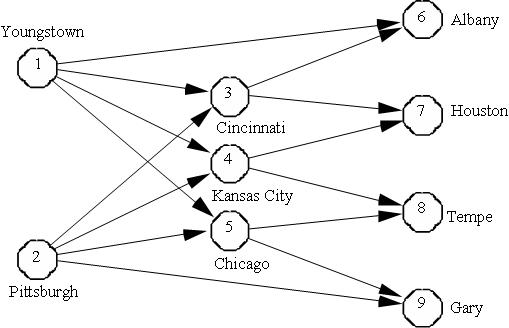
</center>



The network represents shipment of finished steel from American Steel's two steel mills located at Youngstown (node 1) and Pittsburgh (node 2) to their field warehouses at Albany, Houston, Tempe, and Gary (nodes 6, 7, 8 and 9) through three regional warehouses located at Cincinnati, Kansas City, and Chicago (nodes 3, 4 and 5). Also, some field warehouses can be directly supplied from the steel mills.

The table below presents the minimum and maximum flow amounts of steel that may be shipped between different cities along with the cost per ton/month of shipping the steel. For example, the shipment from Youngstown to Kansas City is contracted out to a railroad company with a minimal shipping clause of 1000 tons/month. However, the railroad cannot ship more than 5000 tons/month due the shortage of rail cars.

| Origin | Destination | Cost | Minimum | Maximum |
|:---:|:---:|:---:|:---:|:---:|
| Youngstown  | Albany  | \$0.50 | - | 1000 |
| Youngstown  | Cincinnati  | \$0.35 | - | 3000 |
| Youngstown  | Kansas City  | \$0.45 | 1000 | 5000 |
| Youngstown  | Chicago  | \$0.375 | - | 5000 |
| Pittsburgh  | Cincinnati  | \$0.35 | - | 2000 |
| Pittsburgh  | Kansas City  | \$0.45 | 2000 | 3000 |
| Pittsburgh  | Chicago  | \$0.40 | - | 4000 |
| Pittsburgh  | Gary  | \$0.45 | - | 2000 |
| Cincinnati  | Albany  | \$0.35 | 1000 | 5000 |
| Cincinnati  | Houston  | \$0.55 | - | 6000 |
| Kansas City  | Houston  | \$0.375 | - | 4000 |
| Kansas City  | Tempe  | \$0.65 | - | 4000 |
| Chicago  | Tempe  | \$0.60 | - | 2000 |
| Chicago  | Gary  | \$0.12 | - | 4000 |

The Youngstown and Pittsburgh mills can produce up to 10,000 tons and 15,000 tons of steel per month, respectively. The current monthly demands at American Steel's four field warehouses are:

| Field Warehouse | Demand |
|:---:|:---:|
| Albany | 3000 |
| Houston | 7000 |
| Tempe | 4000 |
| Gary | 6000 |

Find the least cost monthly shipment plan.

Source: https://projects.coin-or.org/PuLP/browser/wiki/ATransshipmentProblem.wiki



### **American Steel: Formulation**

This is a more general form of a transportation problem, called a *transhipment problem*. In the transportation problems discussed above (e.g., the KC Power, Water shortage), there are supply nodes that produce the product and demand nodes that consume the product. Here, there is a third kind of node called *transhipment node* through which the product is simply transported without any production or consumption taking place. Therefore, to minimize costs, the amount entering these nodes must be equal to the amount exiting them.

The regional warehouses at Cincinnati, Kansas City, and Chicago are the transhipment nodes.

<br></br>

**Decision Variables**: We will define a variable $x_{ij}$ to denote the flow along the arc going from Node $i$ to Node $j$. Hence, there will be 14 variables corresponding to the 14 arcs.

**Objective**: Let the cost of flow along arc $(i,j)$ be $c_{ij}$. Our objective is to minimize the total transportation cost.

  $$\text{ Minimize}\sum_{\text{over all arcs } (i,j)} c_{ij}x_{ij} $$

**Constraints**: There will be two types of constraints:



1.   Each arc, $x_{ij}$ must be between the Minimum and the Maximum limits specified in the table.
2.   For each node, we will write a constraint of the following form: \

 *External Supply + Total amount flowing into the node from other nodes >= \
Total amount flowing out of the node to the other node + External Demand.*

Observe that, in this problem, the total supply is 25,000 tons/month while the total demand is 20,000 tons/month. Although we have surplus supply, the above constraints are sufficient. To see why, let's focus on the 3 kinds of nodes from the right to the left:

1.   The *Demand* nodes (nodes 6 - 9): These nodes have external demand. Their respective constraint implies that the amount flowing into each node must be weakly higher than their respective demands. But, sending more than what's demanded is costly; hence, in the optimal solution, each node will receive an amount exactly equal to their respective demand.

2.   The *Transhipment* nodes (nodes 3 - 5): These nodes have no external demand or supply. The constraints corresponding to each node does not rule out more amount entering the node than leaving the node. But, once again, we know that such a flow is needlessly costly. In the optimal solution, the amount entering and leaving all three transhipment nodes will be equal.

3.  The *Supply* nodes (nodes 1, 2): Even though these supply nodes have extra capacity, the total amount flowing out of them will be exactly equal to the total amount that is ultimately demanded in nodes 6 - 9.

###**American Steel: Solution**

#### **Part 1: Reading the parameters**

This problem has too many decision variables and constraints. Therefore, manually typing all of them is quite cumbersome and may lead to errors.

Instead, we can save the parameters into a excel/csv file, place the file in the content folder, and import it as a dataframe (i.e., a table) in Python. Throughout this exercise, we will use the Pandas library, which is Python's most popular library for data manipulation and analysis.

In [ ]:
# We first need to import the pandas library.

from pandas import *

# We can manually drag and drop the parameter file to the content folder on Colab (this is the folder
# icon on the leftmost panel).
# The uploaded file will be deleted once your colab session ends

# read_excel function reads the specific sheet of the excel file that we uploaded.
# index_col is the column that contains the unique identifer for each row. For the 'Nodes' excel sheet,
# the name of the node is the unique identifier, and it is the first column in the sheet.
# Hence, by specifying index_col = 0, we are labeling the first column as the unique identifier for each row.
# The content of the excel sheet 'Nodes' will be stored in a dataframe called 'Node_df'.


Node_df = read_excel('American_Steel_Parameters.xlsx', sheet_name = 'Nodes', index_col = 0)

# just to see what it looks like, we can print the index of Node_df
# observe below, that the output is just a list of the nodes
print(Node_df.index)

print() # prints a blank line
# the following prints the first index
print('First index: ', Node_df.index[0])

# loc function retrieves the value contained from a location
# The following line will print the the value of Supply corresponding to the first index
print('Supply at first Node: ', Node_df.loc[Node_df.index[0], 'Supply'])
print('Demand at first Node: ', Node_df.loc[Node_df.index[0], 'Demand'])

# head(10) displays the first 10 rows of the dataframe Node_df.
# Since our dataset only has 9 rows, we are able to display the entire dataset.

Node_df.head(10)

Index(['Youngstown', 'Pittsburgh', 'Cincinatti', 'Kansas City', 'Chicago',
       'Albany', 'Houston', 'Tempe', 'Gary'],
      dtype='object', name='Node')

First index:  Youngstown
Supply at first Node:  10000
Demand at first Node:  0


,Supply,Demand
Node,,
Youngstown,10000,0
Pittsburgh,15000,0
Cincinatti,0,0
Kansas City,0,0
Chicago,0,0
Albany,0,3000
Houston,0,7000
Tempe,0,4000
Gary,0,6000


In [ ]:
# In the same way, we are reading the second sheet of the excel file where we have data for the arcs.
# The unique identifier for each arc is the combination of its Origin (column 0, i.e, the first column)
# and Desitination (column 1, i.e, the second column).
# Hence, the we specify the index as the combination of columns 0 and 1.
# We store the arc data in the Arc_df dataframe.

Arc_df = read_excel('American_Steel_Parameters.xlsx', sheet_name = 'Arcs', index_col = [0,1])


# just to see what it looks like, we can print the index of Arc_df
print(Arc_df.index)
print() # prints a blank line

# observe below, that this is just a list of the origins and destinations.
# we can further access this list and print the required origin or destination.
print('First index: ',Arc_df.index[0])
print('Origin in first index: ', Arc_df.index[0][0])
print('Destination in first index: ', Arc_df.index[0][1])

print() # print a blank line

# Displaying the Arc_df dataframe.
Arc_df.head(15)

MultiIndex([( 'Youngstown',      'Albany'),
            ( 'Youngstown',  'Cincinatti'),
            ( 'Youngstown', 'Kansas City'),
            ( 'Youngstown',     'Chicago'),
            ( 'Pittsburgh',  'Cincinatti'),
            ( 'Pittsburgh', 'Kansas City'),
            ( 'Pittsburgh',     'Chicago'),
            ( 'Pittsburgh',        'Gary'),
            ( 'Cincinatti',      'Albany'),
            ( 'Cincinatti',     'Houston'),
            ('Kansas City',     'Houston'),
            ('Kansas City',       'Tempe'),
            (    'Chicago',       'Tempe'),
            (    'Chicago',        'Gary')],
           names=['Origin', 'Destination'])

First index:  ('Youngstown', 'Albany')
Origin in first index:  Youngstown
Destination in first index:  Albany



Cost   Min   Max
Origin      Destination                   
Youngstown  Albany       0.500     0  1000
            Cincinatti   0.350     0  3000
            Kansas City  0.450  1000  5000
            Chicago      0.375     0  5000
Pittsburgh  Cincinatti   0.350     0  2000
            Kansas City  0.450  2000  3000
            Chicago      0.400     0  4000
            Gary         0.450     0  2000
Cincinatti  Albany       0.350  1000  5000
            Houston      0.550     0  6000
Kansas City Houston      0.375     0  4000
            Tempe        0.650     0  4000
Chicago     Tempe        0.600     0  2000
            Gary         0.120     0  4000

There is another more cumbersome way of saving the parameters.


1.   Instead of using an excel file, we can use another popular Python datatype called *dictionary*.
2.   We can convert the dictionary into a Pandas dataframe.

Dictionary datatype takes two sets of inputs: *keys* and *values*.

We can think of *keys* as column names and the *values* as the data stored in the rows under the specific column.

The purpose of taking the second approach is just to demonstrate another way of entering parameters. This approach, of course, will be too much of a hassle if we have too many parameters.


In [ ]:
from pandas import *

# We first create a dictionary called Node_dict for the Nodes with 'Node', 'Supply', and 'Demand' as keys and the associated data as values.

Node_dict = {'Node' : ['Youngstown','Pittsburgh','Cincinatti','Kansas City','Chicago','Albany','Houston','Tempe','Gary'],
             'Supply' : [10000,15000,0,0,0,0,0,0,0],
             'Demand' : [0,0,0,0,0,3000,7000,4000,6000]}


print('Supply at first node: ', Node_dict['Supply'][0])

# We can convert the dictionary into a dataframe using the Pandas' Dataframe() function.
# This will give us a dataframe with the keys of the dictionary as columns, and the corresponding values as rows.

Node_df = DataFrame(Node_dict)

# As we did above, we are specifying the 'Node' column as the index or the unique identifer for a row.

Node_df = Node_df.set_index('Node')

# Displaying the Node_df dataframe

Node_df.head(10)


Supply at first node:  10000


,Supply,Demand
Node,,
Youngstown,10000,0
Pittsburgh,15000,0
Cincinatti,0,0
Kansas City,0,0
Chicago,0,0
Albany,0,3000
Houston,0,7000
Tempe,0,4000
Gary,0,6000


In [ ]:
# We will similarly create another dictionary, Arc_dict, to store the arc data.
# The keys would be the 'Origin', 'Destination', 'Cost', 'Min', and 'Max'.

Arc_dict = {'Origin' : ['Youngstown', 'Youngstown', 'Youngstown','Youngstown','Pittsburgh','Pittsburgh','Pittsburgh',\
                         'Pittsburgh','Cincinatti','Cincinatti','Kansas City','Kansas City','Chicago','Chicago'],
             'Destination' : ['Albany', 'Cincinatti', 'Kansas City','Chicago','Cincinatti','Kansas City','Chicago',\
                              'Gary','Albany','Houston','Houston','Tempe','Tempe','Gary'],
             'Cost' : [0.5,0.35,0.45,0.375,0.35,0.45,0.4,0.45,0.35,0.55,0.375,0.65,0.6,0.12],
             'Min' : [0,0,1000,0,0,2000,0,0,1000,0,0,0,0,0],
             'Max' : [1000,3000,5000,5000,2000,3000,4000,2000,5000,6000,4000,4000,2000,4000]}

# Coverting the arc data into a dataframe.
Arc_df = DataFrame(Arc_dict)

# print the origin of the second arc
print('Origin of the second arc: ', Arc_dict['Origin'][1])

# The index or the unique identifier for each arc would be the combination of Origin and Destination.
# Hence, we are specifying the combination of these two columns as the index for the Arc_df dataframe.

Arc_df = Arc_df.set_index(['Origin','Destination'])

# Displaying the Arc_df dataframe

Arc_df.head(15)

Origin of the second arc:  Youngstown


Cost   Min   Max
Origin      Destination                   
Youngstown  Albany       0.500     0  1000
            Cincinatti   0.350     0  3000
            Kansas City  0.450  1000  5000
            Chicago      0.375     0  5000
Pittsburgh  Cincinatti   0.350     0  2000
            Kansas City  0.450  2000  3000
            Chicago      0.400     0  4000
            Gary         0.450     0  2000
Cincinatti  Albany       0.350  1000  5000
            Houston      0.550     0  6000
Kansas City Houston      0.375     0  4000
            Tempe        0.650     0  4000
Chicago     Tempe        0.600     0  2000
            Gary         0.120     0  4000

In [ ]:
# Before proceeding any further, let's consider an example of 'for loop' in python

# Define an array, "names", with 3 elements
names = ['alpha', 'beta', 'gamma']

# Below, "name" is the loop variable.
# It picks one element at a time from the "names" array and prints it
for name in names:
  print(name)

alpha
beta
gamma


#### **Part 2: Creating a lp problem in pulp**

The next step would be to create the lp problem in pulp. We will define the variables, objective function, and constraints one by one.

Since we have too many variables and constraints, we would use for loops instead of entering them manually.

In [ ]:
# Create the shell of the lp problem

prob = LpProblem("American_Steel",LpMinimize) # This is a cost minimization problem.

# Create a variable for each arc to denote the amount transported along that arc.
# pulp offers a way of creating a variable for each identifier in the arc dataset by using a dictionary of variables.
# We name this dictionary 'transport'.

transport = LpVariable.dicts('Route', Arc_df.index, lowBound = 0, upBound = None, cat = 'Continuous')

# The above code creates a dictionary of variables called transport with key = (origin, destination) and value = Route_(Origin,Destination).
# Please observe the first line of the output below to see what this dictionary looks like.

print(transport)

print() # print blank line
print() # print blank line

# Next we would need to set the upper and lower bound for each Route using the 'Max' and 'Min' columns in the Arc_df dataframe.

# Here arc is the loop variable that loops through the Arc_df.index series.
# The .loc method selects the row of the Arc_df dataframe whose index == arc.
# We then read the data from the 'Min' and 'Max' columns of the selected row, and set them as the upper and lower bounds on the Arc variable.
# transport[arc] helps us access the variable in the transport dictionary whose (origin, destination) has the same value as the arc variable.

for arc in Arc_df.index:
    transport[arc].bounds(Arc_df.loc[arc, 'Min'], Arc_df.loc[arc, 'Max'])


# We have defined our variables. The next step is to define the objective function.


# The objective function is the sum product of quantity transported along an arc * the cost of transportation for that arc.
# Once again, we loop through all the rows of the Arc_df dataframe,
# select the cost data from the 'Cost' column for each row, and multiply with the variable corresponding to that arc in the transport dictionary.

prob += lpSum( [ Arc_df.loc[arc, 'Cost' ] * transport[arc] for arc in Arc_df.index ] ), "Total_Transportation_Cost"


# The final step in defining the lp problem would be to create the constraints.
# For every node, our constraint would be:
#      External Supply to the Node + Total amount flowing into the node >= Demand at that Node + Total amount flowing out of the node.

# We now loop through each row of the Node_df dataframe.
# The total supply at a node = data corresponding to the 'Supply' column + the total amount flowing into that node from other nodes.
# To calculate the total amount flowing into a node, we need to find all arcs that end at the node and add the amount transported through them.

# The total demand at a node =  data corresponding to the 'Demand' column + the total amount flowing out of that node to other nodes.
# To calculate the total amount flowing out of a node, we need to find all arcs that originate at the node and add the amount transported through each.
# In python '\' indicates that the command continues to the next line

for node in Node_df.index:
    prob += ( Node_df.loc[node,'Supply'] + lpSum( [ transport[arc] for arc in Arc_df.index if arc[1] == node ] ) >= \
              Node_df.loc[node,'Demand'] + lpSum( [ transport[arc] for arc in Arc_df.index if arc[0] == node ] ) ),\
                                                                                "Steel Flow Conservation in Node %s"%node

# In this loop node is the loop variable that loops through the Node_df.index series.
# For each arc = (origin, destination) pair in the index of Arc_df, arc[0] = origin and arc[1] = destination.
# 'Arc_df.index if arc[0] == node' selects those arcs whose origin is same as the current value of the 'node' loop variable.
# Similarly, 'Arc_df.index if arc[1] == node' selects those arcs whose destination is same as the current value of the 'node' loop variable.

# Note that '"Steel Flow Conservation in Node %s"%node' allows use assign a unique human readable name to each constraint.

# We have now created the problem! We can print it using the following code!
print(prob)

{('Youngstown', 'Albany'): Route_('Youngstown',_'Albany'), ('Youngstown', 'Cincinatti'): Route_('Youngstown',_'Cincinatti'), ('Youngstown', 'Kansas City'): Route_('Youngstown',_'Kansas_City'), ('Youngstown', 'Chicago'): Route_('Youngstown',_'Chicago'), ('Pittsburgh', 'Cincinatti'): Route_('Pittsburgh',_'Cincinatti'), ('Pittsburgh', 'Kansas City'): Route_('Pittsburgh',_'Kansas_City'), ('Pittsburgh', 'Chicago'): Route_('Pittsburgh',_'Chicago'), ('Pittsburgh', 'Gary'): Route_('Pittsburgh',_'Gary'), ('Cincinatti', 'Albany'): Route_('Cincinatti',_'Albany'), ('Cincinatti', 'Houston'): Route_('Cincinatti',_'Houston'), ('Kansas City', 'Houston'): Route_('Kansas_City',_'Houston'), ('Kansas City', 'Tempe'): Route_('Kansas_City',_'Tempe'), ('Chicago', 'Tempe'): Route_('Chicago',_'Tempe'), ('Chicago', 'Gary'): Route_('Chicago',_'Gary')}


American_Steel:
MINIMIZE
0.12*Route_('Chicago',_'Gary') + 0.6*Route_('Chicago',_'Tempe') + 0.35*Route_('Cincinatti',_'Albany') + 0.55*Route_('Cincinatti',_'Houst

#### **Part 3: Solving the lp and exporting the optimal solution.**

We will now solve the lp as we usually do. Additionally, we will export the solution as a csv file by creating an extra column in the Arc_df dataframe.

In [ ]:
# We can now solve the problem and print out the variables as we normally do!

prob.solve()

# Show Status
print("Status:", LpStatus[prob.status])

print("Total Cost of Transportation = ", value(prob.objective))

# Print each variable
for v in prob.variables():
    print(v.name, "=", v.varValue)


# Finally, we want to export a csv that contains the optimal amount that needs to be transported along each arc.

# We would create an empty list and then store the optimal value for each arc in the list
Optimal_Quantity = []

# Looping through each arc of the Arc_df dataset and storing the optimal value of the corresponding variable to the optimal quantity list.
# 'transport[arc].varValue' contains the optimal value of the variable corresponding to the 'arc' loop variable
# The 'append' function adds values to the list one by one

for arc in Arc_df.index:
    Optimal_Quantity.append(transport[arc].varValue)

# We can now add the this list as a column to the Arc_df dataframe.

Arc_df['Optimal Quantity'] = Optimal_Quantity

# Pandas' to_csv function is useful in exporting the dataframe. The exported csv file can also be found in the content folder.
Arc_df.to_csv('American_Steel_Solution.csv')

# We can also print the modified Arc_df dataframe with the solution column.
Arc_df.head(25)

Status: Optimal
Total Cost of Transportation =  15005.0
Route_('Chicago',_'Gary') = 4000.0
Route_('Chicago',_'Tempe') = 2000.0
Route_('Cincinatti',_'Albany') = 2000.0
Route_('Cincinatti',_'Houston') = 3000.0
Route_('Kansas_City',_'Houston') = 4000.0
Route_('Kansas_City',_'Tempe') = 2000.0
Route_('Pittsburgh',_'Chicago') = 3000.0
Route_('Pittsburgh',_'Cincinatti') = 2000.0
Route_('Pittsburgh',_'Gary') = 2000.0
Route_('Pittsburgh',_'Kansas_City') = 3000.0
Route_('Youngstown',_'Albany') = 1000.0
Route_('Youngstown',_'Chicago') = 3000.0
Route_('Youngstown',_'Cincinatti') = 3000.0
Route_('Youngstown',_'Kansas_City') = 3000.0


Cost   Min   Max  Optimal Quantity
Origin      Destination                                     
Youngstown  Albany       0.500     0  1000            1000.0
            Cincinatti   0.350     0  3000            3000.0
            Kansas City  0.450  1000  5000            3000.0
            Chicago      0.375     0  5000            3000.0
Pittsburgh  Cincinatti   0.350     0  2000            2000.0
            Kansas City  0.450  2000  3000            3000.0
            Chicago      0.400     0  4000            3000.0
            Gary         0.450     0  2000            2000.0
Cincinatti  Albany       0.350  1000  5000            2000.0
            Houston      0.550     0  6000            3000.0
Kansas City Houston      0.375     0  4000            4000.0
            Tempe        0.650     0  4000            2000.0
Chicago     Tempe        0.600     0  2000            2000.0
            Gary         0.120     0  4000            4000.0

## **Standard LP Formulation for Minimum-Cost Flow Problems**

**Decision Variables**: For each arc $(i,j)$ going from Node $i$ to Node $j$, we will define a variable $x_{ij}$ to denote the flow along the arc.

**Objective Function**: Let the cost of flow along arc $(i,j)$ be $c_{ij}$.

  $$\text{ Minimize}\sum_{\text{over all arcs } (i,j)} c_{ij}x_{ij} $$

**Constraints**:

1.   For each node $i$, the flow must be balanced: \

 *External Supply to the node $S_i (\ge 0)$ + Total amount flowing into the node from other nodes >= \
Total amount flowing out of the node to the other node + External Demand to the node $D_i (\ge 0)$.* \
Therefore,

$$S_i + \sum_{j} x_{ji} \ge D_i + \sum_{k} x_{ik} $$

2.   For each arc $(i,j)$, the flow must be between a lower limit $l_{ij}$ (if no lower limit is explicitly mentioned, $l_{ij} = 0$) and an upper limit $u_{ij}$ (if no upper limit is explicitly mentioned, $u_{ij} = \infty$). Therefore,

$$l_{ij} \le x_{ij} \le u_{ij}$$

## **Convert the Inventory Problem into a Minimum Cost Flow Problem**

## **Mid-West Air**

Mid-West Air has been forced to cancel a direct flight from Austin to Chicago on Monday morning due to an equipment malfunction. As a result, many passangers are waiting in Austin and the next direct flight to Chicago is not until that afternoon. However, there are some vacancies in other flights scheduled in the morning as shown in the table.

| Route | Vacancies |
|:---:|:---:|
| Austin - Dallas | 20 |
| Austin - Kansas City | 30 |
| Dallas - Denver | 40 |
| Dallas - Kansas City | 30 |
| Denver - Chicago | 10 |
| Kansas City - Chicago | 20 |

Formulate a LP to find how many of these passengers can Mid-West Air reroute to Chicago on Monday morning.

### **Mid-West Air: Formulation**

This is a maximum flow LP problem.

The network for this problem is shown below. Flow $x_{ij}$ represents the number of passengers transported along the arc from node $i$ to node $j$. The values in paranthesis represent the maximum capacity of each arc. Note that the arc coming out of the source node or the one going into the sink node has no capacity limit.

Once we set up the network, we can use the standard lp formulation for Maximum Flow problems outlined below.

<br></br>
<center>

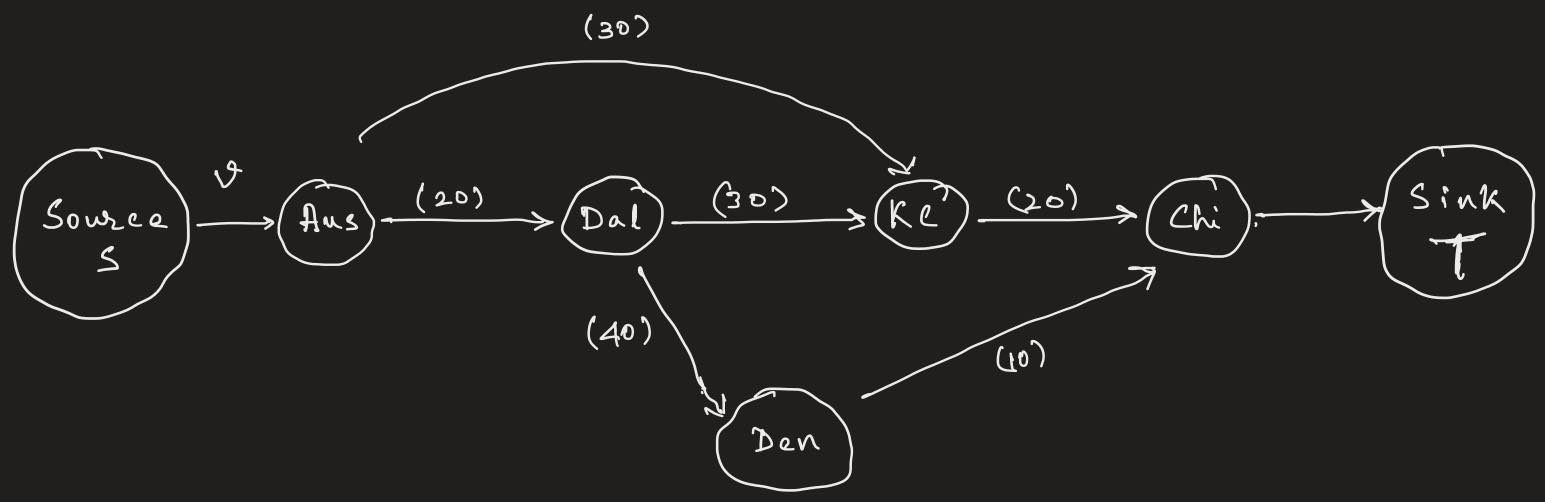

## **Standard LP Formulation for Maximum Flow Problems**

**Decision Variables**:
1.    $x_{ij}$ : Flow along the arc $(i,j)$, i.e., the arc going from Node $i$ to Node $j$.
2.    $v$ : Denotes the amount flowing from the source (origin) node to the sink (destination) node.

**Objective Function**: We need to maximize the amount $v$ that we can send from the source to the sink through the network.

  $$\text{ Maximize } v $$

**Constraints**:

1.   For each node $i$, the flow must be balanced:

  *   *Source Node*: Nothing flows into it, only amount $v$ flows out of it.
  *   *Sink Node*: Nothing flows out of it, only amount $v$ flows into it.
  *   *All other Nodes*: The amount flowing into it should be equal to the amount flowing out. This is because we do not want any flow to accumulate at a node; otherwise, the amount flowing into the sink will be less than $v$.\
$$\sum_{k} x_{ik} - \sum_{j} x_{ji} = \begin{cases}
v, \quad &\text{ if $i$ is the Source} \\
-v, \quad &\text{  if $i$ is the Sink } \\
0, \quad &\text{  for all other nodes }
\end{cases}$$

2.   For each arc, the flow must be between a lower limit $l_{ij}$ (if no lower limit is explicitly mentioned, $l_{ij} = 0$) and an upper limit $u_{ij}$ (if no upper limit is explicitly mentioned, $u_{ij} = \infty$). Therefore,

$$l_{ij} \le x_{ij} \le u_{ij}$$

<br></br>



## **Integrality Theorem**

In network flow problems, the optimal values of the decision variables, i.e., the flow along each arc, will be **integers** as long as the right hand side of the constraints are integers. These right hand side values indicate supply, demand, and upper and lower limit on arc capacities.

This will be *true for all network-flow problems that we consider in this class*. Hence, in these problems, we will get an **integer solution even if we just work with continuous variables**. This property makes network-flow LPs very useful!

## **Match Making**

The following table represents drivers (rows) and riders (columns) who are currently active on a ride-sharing app. The app can only match riders with drivers who are close by (represented by a "C" in the table) and not with drivers are far away (represented by a "-" in the table). *One driver can only be matched with one rider and vice-versa.*

| Candidate | Frances  | Gale | Hayden | James | Kyle |
|:---:|:---:|:---:|:---:|:---:|:---:|
| **Alex** | - | C | - | - | - |
| **Blake** | C | - | - | - | - |
| **Corey** | C | C | - | - | - |
| **Drew** | C | C | - | - | C |
| **Eden** | - | - | C | C | C |

Suppose the app wants to maximize the number of matched driver-rider pairs. Represent the app's optimization problem as a network and formulate the associated LP.

### **Match Making: Formulation**

We can represent the matching as a maximum flow LP problem.

The network for this problem is shown below. Only drivers and riders who are close by (represented by a "C" in the table) are connected by arcs. Flow $x_{ij}$ through any of the middle arcs connecting driver $i$ with rider $j$ represents whether the two have been matched. *In the network, all arcs should have a capacity $1$*. This restricts one rider from matching with multiple drivers and vice-versa.

Because of the **Integrality Theorem**, if we limit the capacities of all arcs to $1$, the optimal $x_{ij}$ will be either $0$ or $1$. As a result, for the middle arcs,

$$x_{ij}  = \begin{cases}
1, \quad &\text{ if driver $i$ has been matched with passenger $j$} \\
0, \quad &\text{ otherwise}
\end{cases}$$

Once we set up the network, we can use the standard lp formulation for Maximum Flow problems outlined above.

<br></br>
<center>

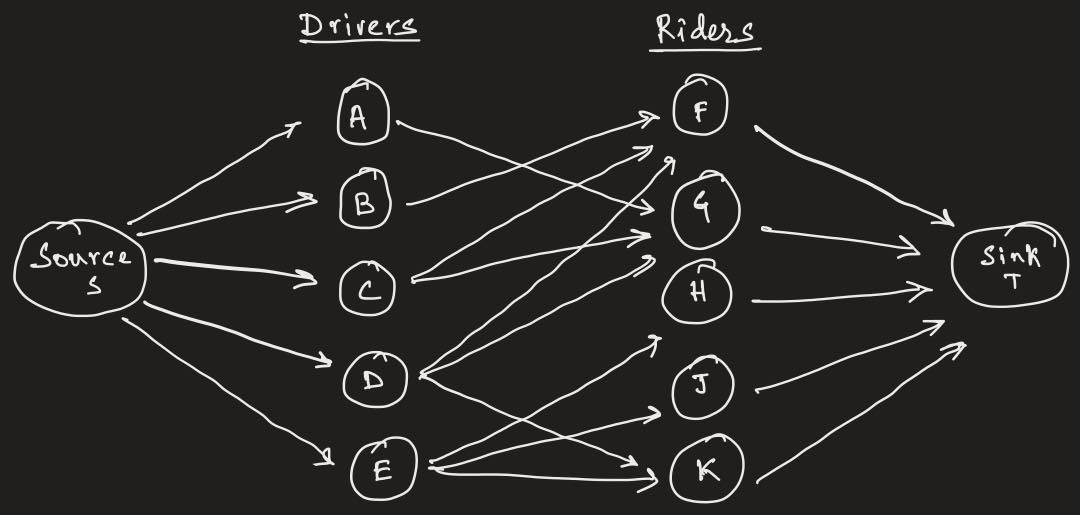

## **Shortest Path**

The following network represents the map of a city, where the nodes are popular tourist attractions while the arc lengths represent the length of the roads connecting these attractions. Formulate an LP to find the shortest path from node 1 to node 4.
<center>

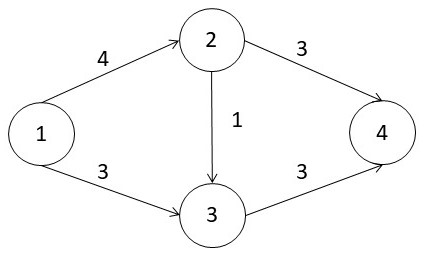
</center>

## **Standard LP Formulation for Shortest Path Problems**

**Decision Variables**: $x_{ij}$, flow along the arc $(i,j)$, i.e., the arc going from Node $i$ to Node $j$.

We want to setup an lp such that:

$$x_{ij}  = \begin{cases}
1, \quad &\text{ if arc $(i,j)$ is included in the shortest path} \\
0, \quad &\text{ otherwise}
\end{cases}$$

**Objective Function**: Let the length of the arc $(i,j)$ be $c_{ij}$.

  $$\text{ Minimize}\sum_{\text{over all arcs } (i,j)} c_{ij}x_{ij} $$

**Constraints**:

1.   For each node $i$, the flow must be balanced:

  *   *Origin Node*: One unit flows out of the source.
  *   *Destination Node*: One unit flows into the sink.
  *   *All other Nodes*: The amount flowing into it should be equal to the amount flowing out. This is because either the shortest path will include the node or it won't.\
$$\sum_{k} x_{ik} - \sum_{j} x_{ji} = \begin{cases}
1, \quad &\text{ if $i$ is the Origin} \\
-1, \quad &\text{  if $i$ is the Destination } \\
0, \quad &\text{  for all other nodes }
\end{cases}$$

2.   For each arc, the flow must be non-negative.

$$x_{ij} \ge 0$$

## **School of Business Printers**

KU School of Business has decided to install new printers throughout the building at the beginning of this year at a total cost of \$12,000. To keep them running smoothly, the printers require yearly maintenance, the cost of which is shown below. The printers can also be sold off at the end of each year at the price shown below and replaced with new ones.

| Age (Years) | Maintenance Cost During the Year | Selling Value at the End of the Year |
|:---:|:---:|:---:|
| 1 | \$2000 | \$7000 |
| 2 | \$4000 | \$6000 |
| 3 | \$5000 | \$2000 |
| 4 | \$9000 | \$1000 |


Suppose cost of installing new printers is always \$12,000, and the costs and values in the above table are also constant. Formulate an LP to suggest a maintainence/replacement schedule that will minimize the net cost for the school during a four year period (i.e., beginning of 2024 - end of 2027).

### **School of Business Printers: Formulation**

This is an example of an *Equipment Replacement Problem* which can also be represented as a shortest path problem if we define our nodes and arcs as follows:


*   *Node $i$*: Represents the *beginning* of year $i$, where $i$ can be Year 1, 2, 3, 4, 5.

*   *Arc $(i,j)$*: For each pair of two nodes $i$ and $j$ such that $j>i$, we will define an arc $(i,j)$. The cost of arc $(i,j)$, $c_{ij}$, is the cost of buying brand new printers at the beginning of year $i$, maintaining printers during years $i$, $i+1$,...,$j-1$, and selling off the printers at the end of year $j-1$. (Thus new printers must be bought at the beginning of year $j$.)  

The network is represented in the figure below. Here are few examples of costs calculated using the above definition:

*   $c_{12}$: This is the cost of buying new printers at the beginning of Year 1, maintaining them for one year, and selling the printers at the end of Year 1. From the above table, $c_{12} = 12000+2000-7000=7000$.
*   $c_{35}$: This is the cost of buying new printers at the beginning of Year 3, maintaining during Years 3 and 4, and selling the printers at the end of Year 4. From the above table, $c_{35} = 12000+2000+4000-6000=12000$.

Observe that by the above definition, the cost of arc $c_{ij}$ is independent of $i$ and depends only on the difference, $j-i$. For example, $c_{13}=c_{24}=c_{35} = 12000$.


Finding a maintainance/relplacement schedule that minimizes the total cost is same as finding the shortest path from node $1$ to node $5$ in the network. Therefore, we can use above the standard lp formulation for the Shortest Path Problem, with node $1$ as the origin and node $5$ as the destination.

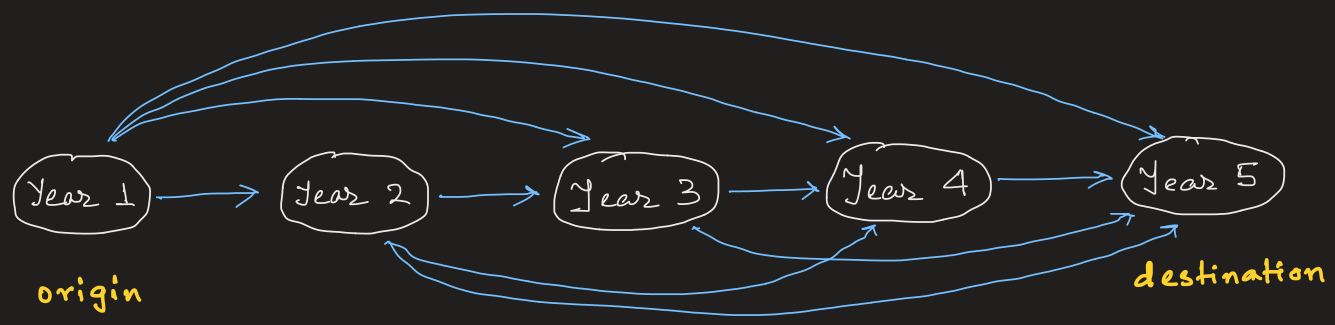

## **Loading the Dishwasher**

You are loading the dishwasher after a night of intense cooking. After loading all the small pots and pans, you have 10 cubic feet of empty volume left for the last three big utensils. You need to handwash any utensil that does not go into the dishwasher. The following table shows the volume of these utilities as well as your utility from dishwashing them. (Utility is a general measure of happiness. In this case, the higher the number, the more you want to put it into the dishwasher to avoid handwashing it.)

| Utensil | Utility | Volume (cubic feet) |
|:---:|:---:|:---:|
| 1 | 11 | 4 |
| 2 | 7 | 3 |
| 3 | 12 | 5 |

Setup this optimization problem as a network-flow LP. What nodes and arc weights would you choose? Write down the standard form of the corresponding LP.

### **Loading the Dishwasher: Formulation**

We need to decide whether or not we put each utensil in the dishwasher depending on which utensil we are talking about, how much capacity we have left, as well as the remaining utensils. We can construct a network similar to a *decision tree*.


*   *Node $(i,v)$*: Represents that:
  * we have already decided what to do with utensils $1,2,...,i-1$,
  * we are currently deciding what to do with utensil $i$,
  * we have $v$ cubic feet of volume left in the dishwasher.

*   *Node 4*: This is a destination node that indicates that we have dealt with all the utlensils. (The leftover volume is irrelevant at this point.)

*   *Arc $(i,j)$*: The length of the arc represents the utility derived by going from node $i$ to node $j$.

This results in the network shown below. Our objective is to maximize the total utility derived from dishwashing, which is equivalent to finding the **longest path** in this network. Therefore, we can use the standard formulation for the shortest path problem after changing the objective from "Minimize" to "Maximize".

Alternatively, we multiply the utilities with $-1$ and find the shortest path (i.e., keep the objective as it is).

Because of the **Integrality Theorem**, our decision variables will have a value of either 0 or 1 in the optimal solution. A value of $1$ will indicate that the arc is included in the optimal path.

<center>

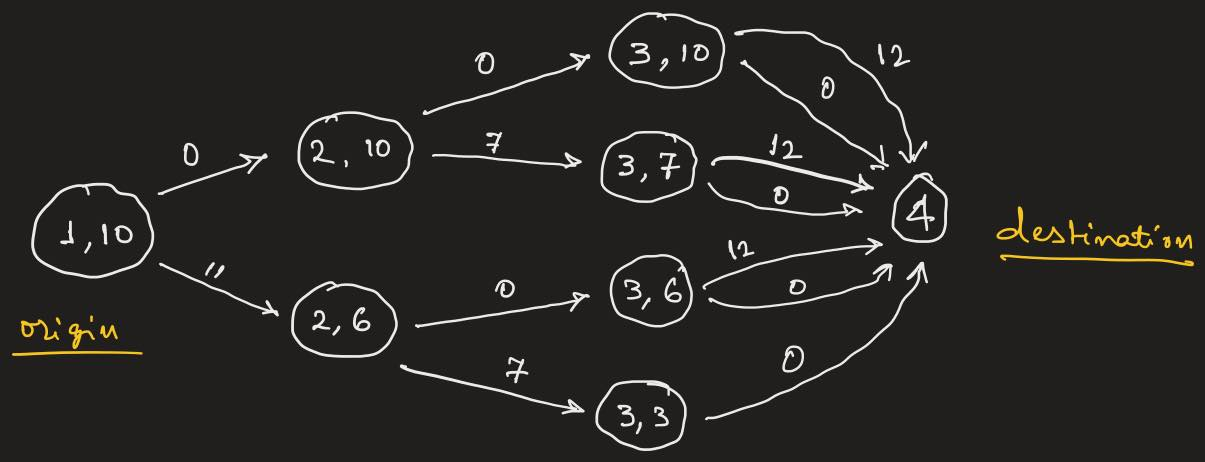

# **Linear Programming in Disguise**

## **Revisiting Lawrence Hospital**

Consider a variation of the Lawrence Hospital problem where we change the objective from $$ \text{Maximize } 12x + 10y $$ to the following:
<br><br>

**Objective:**

$$\text{Maximize } \text{ Minimum }(x,y) $$
<br><br>
**Constraints**:

1.   Max wipes:&emsp; $0\le x \le 15$
2.   Max sanitizer:&emsp; $0\le y \le 15$
3.   Max total quantity:&emsp; $x + y \le 20$
4.   Max budget:&emsp; $30x + 20y \le 500$


<br><br>
This is **not a linear objective function**. \
To help you visualize the shape of the objective function, the figure below plots the function $\text{ Minimum }(x,y)$.

How can we convert this to an LP?

In [ ]:
!pip install plotly
import plotly
import plotly.graph_objects as go
import numpy as np

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)

Obj = np.zeros([len(x),len(y)])
for i in range(0,len(x)):
  for j in range(0,len(y)):
    Obj[i,j] = min(x[i],y[j])

Y, X = np.meshgrid(y, x)

data = [go.Surface(x=X, y=Y, z=Obj, opacity=0.9, colorscale='Oranges', showscale=False)]

layout = go.Layout(
    title='Shape of Minimum(X,Y)',
    autosize=False,
    width=500,
    height=750,
    scene=dict(
        xaxis=dict(title=r"X"),
        yaxis=dict(title=r"Y"),
        zaxis=dict(title=r"Minimum(X,Y)")),
        #range=[0,20]),
    margin=dict(l=65,r=50,b=65,t=90)
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")


### **Lawrence Hospital: New Formulation**

We will convert the objective function $\text{ Minimum }(x,y)$ to a linear function using an **auxilliary variable** $Z$. Our final formulation is as follows.
<br><br>

**Decision variables**:

(a)  Original decision variables:&emsp; $x,y$ \
(b)  Additional auxilliary variable: $Z$



**Objective**: Maximize the $\text{ Minimum }(x,y)$

$$\text{Maximize } Z $$


**Constraints**:


1.  Original constraints on $x$ and $y$:\
(a) $0\le x \le 15$\
(b) $0\le y \le 15$\
(c) $x + y \le 20$\
(d) $30x + 20y \le 500$

2.  Additional constraints to linearize $\text{ Minimum }(x,y) $:\
(a) $Z \le x$\
(b) $Z \le y$

**Note:**
*   The constraints imply that $Z$ needs to lower than or equal to each of $x$  and $y$. Hence, $Z$ would be lower than or equal to the $\text{ Minimum }(x,y)$. But since we are Maximizing $Z$, the optimal value of $Z$ will, in fact, be exactly equal to $\text{ Minimum }(x,y)$ and not something that is strictly lower. In other words, in the optimal solution, at least one of the constraints 2(a) or 2(b) would be tight.

*   $Z$ does not have a lower bound; hence, the feasible region for this LP is unbounded. However, since we are maximizing $Z$, this is not a problem and the above LP has an optimal solution.

## **Urgent Care Clinics - Part 1**

There are three Urgent Care Clinics in Lawrence that treat patients with moderate or severe health problems before they turn into an emergency. The mayor's office has hired 25 doctors to work in these clinics. It is estimated that for every doctor working in an Urgent Care Clinic, the number of emergency cases in the surrounding population decreases by 5 per week in clinic 1, 4 per week in clinic 2, and by 3 per week in clinic 3 (the difference in outcome is due to the difference in population density around the clinics). However, having too many doctors in a clinic is counter productive. Hence, it is recommended that the number of doctor in any clinic should not exceed 10.  

How should the 25 doctors be divided among the three clinics to maximize the total reduction in emergency cases? For simplicity assume that fractional distribution is possible.



### **Urgent Care Clinics - Part 1: Formulation**

**Decision variables**:

Number of Doctors in each clinic:&emsp; $x_1, x_2, x_3$
<br></br>

**Objective**: Maximize the total reduction in emergency cases

$$\text{Maximize } 5x_1 + 4x_2 + 3x_3 $$


**Constraints**:

1.  The number of doctors in each clinic: &emsp; $0 \le x_1,x_2,x_3 \le 10$
2.  Total Number of Doctors: &emsp; $x_1 + x_2 + x_3 = 25$


### **Urgent Care Clinics - Part 1: Solution**



In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Urgent_Care_Clinics_1",LpMaximize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

x1=LpVariable("Clinic-1", lowBound = 0, upBound = 10, cat='Continuous')
x2=LpVariable("Clinic-2", lowBound = 0, upBound = 10, cat='Continuous')
x3=LpVariable("Clinic-3", lowBound = 0, upBound = 10, cat='Continuous')




# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 5*x1 + 4*x2 + 3*x3, "Total_Reduction"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += x1 + x2 + x3 == 25, "Total_Doctors"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("Covid_Clinic_1.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Urgent_Care_Clinics_1:
MAXIMIZE
5*Clinic_1 + 4*Clinic_2 + 3*Clinic_3 + 0
SUBJECT TO
Total_Doctors: Clinic_1 + Clinic_2 + Clinic_3 = 25

VARIABLES
Clinic_1 <= 10 Continuous
Clinic_2 <= 10 Continuous
Clinic_3 <= 10 Continuous

Status :  Optimal
Objective :  105.0
Variable :  Clinic_1  :  10.0
Variable :  Clinic_2  :  10.0
Variable :  Clinic_3  :  5.0
Constraint :  Total_Doctors  :  0.0


## **Urgent Care Clinics - Part 2**


The uneven distribution of doctors (derived in part 1) among the three clinics have caused dissatisfaction among the residents of Lawrence, all of whom believe that more doctors should be assigned to the clinic nearest to them. As a result, the mayor's office wants to assign doctors in such a way that the number of emergency cases isn't very high in any part of the city. Formulate an LP to suggest an assignment that maximizes the minimum reduction in the number of emergency cases among the clinics.


### **Urgent Care Clinics - Part 2: Formulation**


**New Objective**: Maximize the *Minimum* decline

$$\text{Maximize } \text{ Minimum }(5x_1,4x_2,3x_3) $$

<br><br>
This is **not a linear objective function**. \

We will convert the objective function $\text{ Minimum }(5x_1,4x_2,3x_3)$ to a LP using the auxilliary variable $Z$. Our final formulation is as follows.
<br><br>

**Decision variables**:

(a)  Number of Doctors in each clinic:&emsp; $x_1, x_2, x_3$ \
(b)  We will define an auxilliary variable: $Z$



**Objective**: Maximize the *Minimum* decline

$$\text{Maximize } Z $$


**Constraints**:

1.  The number of doctors in each clinic: &emsp; $0 \le x_1,x_2,x_3 \le 10$

2.  Total Number of Doctors: &emsp; $x_1 + x_2 + x_3 = 25$

3.  Linearize $\text{ Minimum }(5x_1,4x_2,3x_3) $\
(a) $Z \le 5x_1$\
(b) $Z \le 4x_2$\
(c) $Z \le 3x_3$

**Note:**
*   The constraints imply that $Z$ needs to lower than or equal to each of $5x_1$, $4x_2$, and $3x_3$. Hence, $Z$ would be lower than or equal to the $\text{ Minimum }(5x_1,4x_2,3x_3)$. But since we are Maximizing $Z$, the optimal value of $Z$ will, in fact, be exactly equal to $\text{ Minimum }(5x_1,4x_2,3x_3)$ and not something that is strictly lower. In other words, in the optimal solution, at least one of the constraints 3(a), 3(b), or 3(c) would be tight.

*   $Z$ does not have a lower bound; hence, the feasible region for this LP is unbounded. However, since we are maximizing $Z$, this is not a problem and the above LP has an optimal solution.

### **Urgent Care Clinics - Part 2: Solution**

Observe that in the optimal solution, $$\text{Objective} = Z = \text{Minimum}(5x_1, 4x_2,3x_3) = 30.0.$$


In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Urgent_Care_Clinics_2",LpMaximize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

x1=LpVariable("Clinic-1", lowBound = 0, upBound = 10, cat='Continuous')
x2=LpVariable("Clinic-2", lowBound = 0, upBound = 10, cat='Continuous')
x3=LpVariable("Clinic-3", lowBound = 0, upBound = 10, cat='Continuous')
Z=LpVariable("Auxilliary", lowBound = 0, upBound = None, cat='Continuous')




# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += Z, "Minimum(5x1, 4x2, 3x3)"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += x1 + x2 + x3 == 25, "Total_Doctors"
prob += Z <= 5*x1, "Linearize-1"
prob += Z <= 4*x2, "Linearize-2"
prob += Z <= 3*x3, "Linearize-3"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("Covid_Clinic_2.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Urgent_Care_Clinics_2:
MAXIMIZE
1*Auxilliary + 0
SUBJECT TO
Total_Doctors: Clinic_1 + Clinic_2 + Clinic_3 = 25

Linearize_1: Auxilliary - 5 Clinic_1 <= 0

Linearize_2: Auxilliary - 4 Clinic_2 <= 0

Linearize_3: Auxilliary - 3 Clinic_3 <= 0

VARIABLES
Auxilliary Continuous
Clinic_1 <= 10 Continuous
Clinic_2 <= 10 Continuous
Clinic_3 <= 10 Continuous

Status :  Optimal
Objective :  30.0
Variable :  Auxilliary  :  30.0
Variable :  Clinic_1  :  7.5
Variable :  Clinic_2  :  7.5
Variable :  Clinic_3  :  10.0
Constraint :  Total_Doctors  :  0.0
Constraint :  Linearize_1  :  -7.5
Constraint :  Linearize_2  :  0.0
Constraint :  Linearize_3  :  0.0


## **Facility Location**


*   *Absolute Value* :
$|x| = \begin{cases}
x, \quad &\text{ if } x \ge 0 \\
-x, \quad &\text{ if } x < 0
\end{cases}$

*   *Manhattan Distance* : The Manhattan distance between two points $(x_1,y_1)$ and $(x_2,y_2)$ on a 2-D graph is defined as $$|x_1-x_2| + |y_1-y_2|.$$

Consider the following problem where we use the above definitions:

<br><br>
There are $m$ major population centers in the state of Kansas located at coordinates $(a_1,b_1), (a_2,b_2),...,(a_m,b_m)$, if plotted on a 2-D map. Amazon wants to build a new warehouse in the state and is looking for a spot that will minimize the time required to fulfill its orders from these population centers. Assume that $t_i$ orders originate in a week at population center $i$, located at $(a_i,b_i)$.

The total time required to fulfill all orders generated at population center $i$ from a warehouse located at $(x,y)$ depends on the Manhattan distance and the number of orders as follows:

$$t_i(|a_i-x| + |b_i-y|).$$

Can you formulate an LP to find the optimal warehouse location that minimizes the total fulfillment time for all these $m$ population centers?



### **Facility Loaction: Formulation**


**Decision variables**:

The coordinates of the warehouse:&emsp; $x,y$\
Note that here $x,y$ can be negative.
<br></br>

**Objective**: Minimize the total time required to fulfill the orders from the warehouse

$$\text{Minimize } \sum_{i=1}^m t_i(|a_i-x| + |b_i-y|)$$

Unfortunately, the absolute value function is not a linear function; consequently, the objective is not a linear function of $x,y$. To transform it to a lp problem, we would use the following fact.

$$ |a-x| = \text{maximum }(a-x, -[a-x]).$$

Now, $\text{maximum }(a-x, -[a-x])$ is also not a linear objective function. However, we can transform it into a linear function by using auxilliary variables as shown below.
<br><br>


**Decision variables**:

The coordinates of the warehouse:&emsp; $x,y$\
Auxilliary variables:&emsp; $u_i,v_i$ for each $i=1,2,...,m$
<br></br>

**Objective**: $$ \text{Minimize } \sum_{i=1}^m t_i(u_i + v_i)$$

**Constraints**:

For every population center $i$, we need the following constraints.

1. Linearize $|a_i-x| = \text{maximum }(a_i-x, -[a_i-x])$.\
(a)   $u_i \ge a_i-x $\
(b)   $u_i \ge -[a_i-x] $

2. Linearize $|b_i-y| = \text{maximum }(b_i-y, -[b_i-y])$.\
(a)   $v_i \ge b_i-y $\
(b)   $v_i \ge -[b_i-y] $

**Note:**

1.   We need to define a $u_i, v_i$ for all $m$ population centers. Hence, we are introducting $2m$ auxilliary variables. Therefore, the lp has $2m+2$ variables (remember, $x$ and $y$ are still our decision variables). Since there are 4 constraints for each $i$, the lp will have $4m$ constraints in all.
2.   The constraints imply that $u_i, v_i$ can be greater than or equal to the respective right hand sides. However, we are minimizing $u_i, v_i$. Hence, in the optimal solution, at least one of the constraints for $u_i$ and at least one of the constraints for $v_i$ would be tight; i.e., in the optimal solution, $u_i = |a_i-x|$ and $v_i = |b_i-y|$.




### **Facility Location: Solution**

We will use the following parameter values for our code:

* Two major population centers: $m=2$.
* Coordinates of population center 1: $(a_1 = 1, b_1 = 1)$
* Coordinates of population center 2: $(a_2 = -1, b_2 = -1)$
* Orders per week generated at population center 1: $t_1 = 1000$
* Orders per week generated at population center 2: $t_2 = 1000$

In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Facility_Location",LpMinimize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

x = LpVariable("x-coordinate", lowBound = None, upBound = None, cat='Continuous')
y = LpVariable("y-coordinate", lowBound = None, upBound = None, cat='Continuous')

u1 = LpVariable("aux-1x", lowBound = None, upBound = None, cat='Continuous')
v1 = LpVariable("aux-1y", lowBound = None, upBound = None, cat='Continuous')

u2 = LpVariable("aux-2x", lowBound = None, upBound = None, cat='Continuous')
v2 = LpVariable("aux-2y", lowBound = None, upBound = None, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 1000*(u1 + v1) + 1000*(u2 + v2), "Fulfillment_time"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.

# |a1 - x| = Maximum (a1-x, -[a1-x] )
prob += u1 >= 1-x, "u1>=a1-x"
prob += u1 >= -(1-x), "u1>=-[a1-x]"

# |b1 - y| = Maximum (b1-y, -[b1-y] )
prob += v1 >= 1-y, "v1>=b1-y"
prob += v1 >= -(1-y), "v1>=-[b1-y]"

# |a2 - x| = Maximum (a2-x, -[a2-x] )
prob += u2 >= -1-x, "u2>=a2-x"
prob += u2 >= -(-1-x), "u2>=-[a2-x]"

# |b2 - y| = Maximum (b2-y, -[b2-y] )
prob += v2 >= -1-y, "v2>=b2-y"
prob += v2 >= -(-1-y), "v2>=-[b2-y]"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("Facility_Location.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Facility_Location:
MINIMIZE
1000*aux_1x + 1000*aux_1y + 2000*aux_2x + 2000*aux_2y + 0
SUBJECT TO
u1>=a1_x: aux_1x + x_coordinate >= 1

u1>=__a1_x_: aux_1x - x_coordinate >= -1

v1>=b1_y: aux_1y + y_coordinate >= 1

v1>=__b1_y_: aux_1y - y_coordinate >= -1

u2>=a2_x: aux_2x + x_coordinate >= -1

u2>=__a2_x_: aux_2x - x_coordinate >= 1

v2>=b2_y: aux_2y + y_coordinate >= -1

v2>=__b2_y_: aux_2y - y_coordinate >= 1

VARIABLES
aux_1x free Continuous
aux_1y free Continuous
aux_2x free Continuous
aux_2y free Continuous
x_coordinate free Continuous
y_coordinate free Continuous

Status :  Optimal
Objective :  4000.0
Variable :  aux_1x  :  2.0
Variable :  aux_1y  :  2.0
Variable :  aux_2x  :  0.0
Variable :  aux_2y  :  0.0
Variable :  x_coordinate  :  -1.0
Variable :  y_coordinate  :  -1.0
Constraint :  u1>=a1_x  :  0.0
Constraint :  u1>=__a1_x_  :  4.0
Constraint :  v1>=b1_y  :  0.0
Constraint :  v1>=__b1_y_  :  4.0
Constraint :  u2>=a2_x  :  0.0
Constraint :  u2>=__a2_x_  :  0.0
Constraint : 

## **Portfolio Optimization**

Two rival electric car makers Nikola and Edison have both promised to unveil new cars this year with new and revolutionary battery technologies. Based on their previous trackrecord, analysts have predicted two different stock market scenarios:

| Stock | Current Share Price | Price in Scenario 1 | Price in Scenario 2 |
|:---:|:---:|:---:|:---:|
| Nikola  | \$1 | \$3 | \$0 |
| Edison  | \$1 | \$1 | \$1.1 |
| **Probability of Scenario**  | |0.8 | 0.2 |

(i) How should you divide your funds between the two stocks to maximize your Average Return (Profit)?

(ii) *Downside Risk* : It is the risk of losing money in scenario $i$. Hence, if the return in scenario $i$ is $r_i$, the downside risk in this scenario, $d_i$, is

$$d_i = \begin{cases}
0, \quad &\text{ if  } r_i \ge 0 \\
-r_i, \quad &\text{ if  } r_i < 0
\end{cases}$$

How should you divide your funds between the two stocks two minimize the *Average Downside Risk* (ADR)?



**Note:** There are several other (often more complicated) ways of measuring downside risk!

(iii) Observe that the two different objectives result in very different investment strategies. Formulate an LP to devise an investment strategy that minimizes Average Downside Risk while ensuring an Average Return of at least \$$\delta$.


### **Portfolio Optimization Part (i): Formulation**

First we need to calculate the returns (profit) from each stock in each scenario from the given data.

| Scenarioes | Nikola | Edison | Probabilities |
|:---:|:---:|:---:|:---:|
| Scenario 1  | \$2 | \$0 | 0.8 |
| Scenario 2  | -\$1 | \$0.1 | 0.2 |


**Decision variables**:

Fraction of total funds invested in Nikola and Edison stocks respectively:&emsp; $x_1, x_2$
<br></br>


**Objective**: We need to maximize the average (or expected) return.  

Let $r_1$ and $r_2$ be the total return in scenarioes 1 and 2 respectively.\
$r_1 = 2x_1 + 0x_2=2x_1$\
$r_2 = -x_1 + 0.1x_2$

Let $p_1$ and $p_2$ be the probabilities of scenarioes 1 and 2 respectively. Then,

\begin{align}
\text{average return} &=p_1r_1 + p_2r_2\\
       &=0.8(2x_1) + 0.2(-x_1 + 0.1x_2)\\
       &=1.4x_1+0.02x_2
\end{align}


Therefore, the objective function is<br></br>
$$\text{Maximize } 1.4x_1 + 0.02x_2$$



**Constraints**:

1.  The two fractions must add upto 1: &emsp; $ x_1 + x_2 = 1$
2.  Non-negativity: &emsp; $x_1, x_2 \ge 0$


**Optimal solution**:

Observe that the optimal solution to this lp is $x_1 = 1$, $x_2 = 0$. Therefore the optimal strategy while maximizing average return would be to invest entirely in the Nikola stock.


### **Portfolio Optimization Part (ii): Formulation**


| Scenarioes | Nikola | Edison | Probabilities |
|:---:|:---:|:---:|:---:|
| Scenario 1  | \$2 | \$0 | 0.8 |
| Scenario 2  | -\$1 | \$0.1 | 0.2 |

We have calculated the total return in scenario 1 ($r_1$) and in scenario 2 ($r_2$) as: \
$r_1 = 2x_1 + 0x_2=2x_1$\
$r_2 = -x_1 + 0.1x_2$

In this part, we need to minimize average (or expected) downside risk, where downside risk in scenario $i$ is the *magnitude of loss in that scenario*. Specifically,
$$d_i = \begin{cases}
0, \quad &\text{ if  } r_i \ge 0 \\
-r_i, \quad &\text{ if  } r_i < 0
\end{cases}$$

Note that we can represent downside risk as $d_i = \text{Maximum }(0,-r_i)$. Then,

\begin{align}
\text{average downside risk} &=p_1d_1 + p_2d_2\\
       &=0.8d_1+0.2d_2
\end{align}

Observe that $d_1$ and $d_2$ are non-linear functions.

<br></br>


**Decision variables**:

*   Fraction of total funds invested in Nikola and Edison stocks respectively:&emsp; $x_1, x_2$
*   Auxilliary variables to represent downside risks in scenarioes 1 and 2:&emsp; $d_1, d_2$


<br></br>


**Objective**: Minimize Average Downside Risk.

$$\text{Minimize } 0.8d_1 + 0.2d_2 $$


**Constraints**:

1.  The two fractions must add upto 1: &emsp; $ x_1 + x_2 = 1$
2.  Non-negativity: &emsp; $x_1, x_2 \ge 0$
3.  We express $d_1 = \text{Maximum }(0,-r_1)$ where $r_1 = 2x_1$ as\
  (a) $d_1 \ge -2x_1$ \
  (b) $d_1 \ge 0$
4.  We express $d_2 = \text{Maximum }(0,-r_2)$ where $r_2 = -x_1 + 0.1x_2$ as\
  (a) $d_2 \ge x_1-0.1x_2$\
  (b) $d_2 \ge 0$



**Optimal solution**:

Since investing in Edison's stock never results in a loss, the optimal solution to the new lp is $x_1 = 0$, $x_2 = 1$. Therefore, the optimal strategy while minimizing average downside risk would be to invest entirely in the Edison stock.


### **Portfolio Optimization Part (iii): Formulation**


The optimal strategy in the first two parts were two extremes:

*   Part (i): Risk Neutral - High risk, high reward
*   Part (ii): Risk Averse - Low risk, low reward

To create a balance, we will add a new constraint to the LP in Part (ii) to ensure that the average return is at least $\$\delta$; i.e.,

$$\text{average return} =p_1r_1 + p_2r_2 \ge \delta.$$

Here, $\delta$ is a parameter that the portfolio manager can choose.
<br>

**Objective**: Minimize Average Downside Risk

$$\text{Minimize } 0.8d_1 + 0.2d_2 $$


**Constraints**:

1.  The two fractions must add upto 1: &emsp; $ x_1 + x_2 = 1$
2.  Non-negativity: &emsp; $x_1, x_2 \ge 0$
3.  We express $d_1 = \text{Maximum }(0,-r_1)$ where $r_1 = 2x_1$ as\
  (a) $d_1 \ge -2x_1$ \
  (b) $d_1 \ge 0$
4.  We express $d_2 = \text{Maximum }(0,-r_2)$ where $r_2 = -x_1 + 0.1x_2$ as\
  (a) $d_2 \ge x_1-0.1x_2$\
  (b) $d_2 \ge 0$
5.  The average return (from the objective in part (i)):&emsp; $1.4x_1 + 0.02x_2\ge \delta$



### **Portfolio Optimization: Solution for Part(iii)**

In [ ]:
# This is the code for Part (iii) of the problem that has been used to create the below figure

from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the problem Lawrence Grocers.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


delta = 1 # This is the parameter for the minimum average return

prob = LpProblem("Portfolio",LpMinimize)

# We next define our decision variables
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

x1 = LpVariable("x1", lowBound = 0, upBound = 1, cat='Continuous')
x2 = LpVariable("x2", lowBound = 0, upBound = 1, cat='Continuous')
d1 = LpVariable("d1", lowBound = 0, upBound = None, cat='Continuous')
d2 = LpVariable("d2", lowBound = 0, upBound = None, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable.


prob += 0.8*d1 + 0.2*d2, "Objective"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += d1 >= -1*(2*x1), "downside_risk1"
prob += d2 >= -1*(-1*x1+0.1*x2), "downside_risk2"
prob += x1 + x2 == 1, "total_funds"
prob += 1.4*x1 + 0.02*x2 >= delta, "minimum_return"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("Portfolio.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())


# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

print("------------")
print("Minimum Return = ",delta)
print("Average Downside Risk = ", value(prob.objective))

Portfolio:
MINIMIZE
0.8*d1 + 0.2*d2 + 0.0
SUBJECT TO
downside_risk1: d1 + 2 x1 >= 0

downside_risk2: d2 - x1 + 0.1 x2 >= 0

total_funds: x1 + x2 = 1

minimum_return: 1.4 x1 + 0.02 x2 >= 1

VARIABLES
d1 Continuous
d2 Continuous
x1 <= 1 Continuous
x2 <= 1 Continuous

Status :  Optimal
Objective :  0.136231884
Variable :  d1  :  0.0
Variable :  d2  :  0.68115942
Variable :  x1  :  0.71014493
Variable :  x2  :  0.28985507
Constraint :  downside_risk1  :  1.42028986
Constraint :  downside_risk2  :  -3.0000000469931898e-09
Constraint :  total_funds  :  0.0
Constraint :  minimum_return  :  3.3999999439135453e-09
------------
Minimum Return =  1
Average Downside Risk =  0.136231884


### **Portfolio Optimization: Efficient Frontier**

The *Efficient Frontier* in the figure below shows the minimum downside risk that has to be incurred for different values of $\delta$ &mdash; the minimum average return that must be ensured. It is not possible to be on the right of the Efficient Frontier. Being very far to the left of the Efficient Frontier means that we are taking on too much risk but not getting high enough return, which is also not good. Therefore, we should try to be as close to the frontier as possible.

Observe that in this figure the maximum possible value of $\delta = 1.4$, the maximum possible average return (see the solution to Part(i)). Choosing a $\delta > 1.4$ will make the problem infeasible.
<br></br>

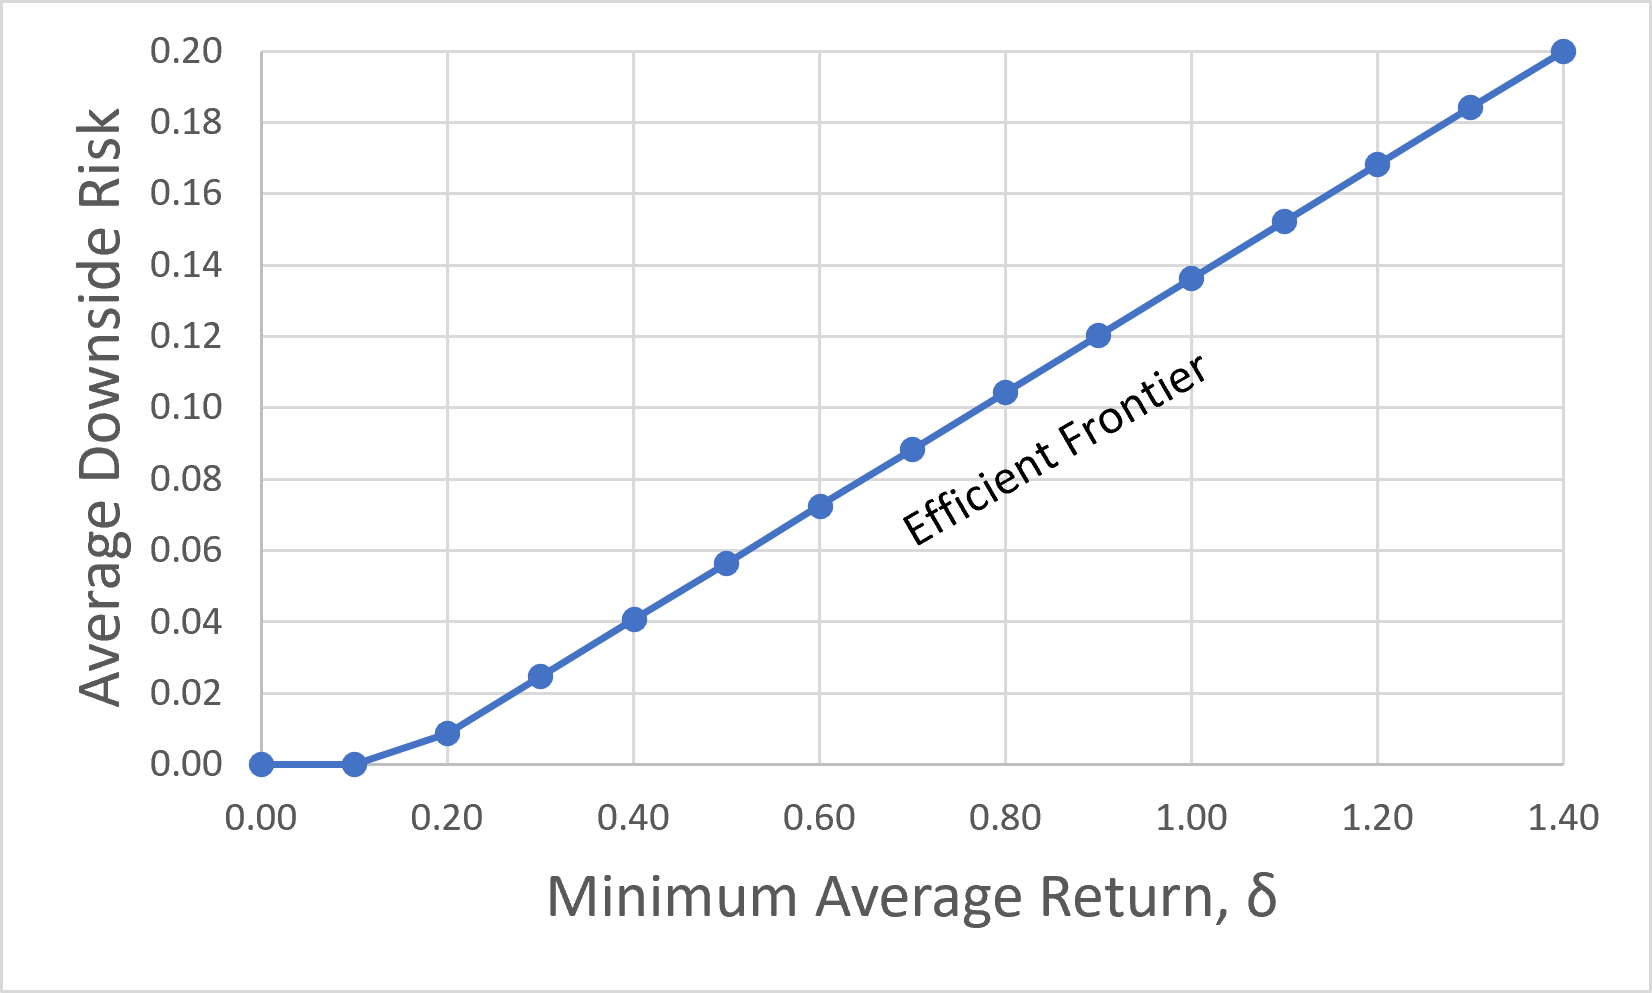

## **Newsvendor Problem**

A vendor needs to decide how many copies of the New York Times to buy for their news stand every morning. The vendor buys a copy of the New York Times for \$1.25 and sells it for \$2.50. All copies that remain unsold by 5pm are nearly worthless, and the vendor can sell them to the nearby recycling center at a salvage price of \$0.25 per copy. Unfortunately, the vendor does not know the exact daily demand while deciding the number of copies to buy in the morning. The vendor only knows that demand is 100 copies with probability 1/2 and 200 copies with probability 1/2. Formulate an LP problem to help the vendor make a decision.



### **Newsvendor Problem: Formulation**

The newsvendor's objective is to choose a quantity to stock,  $Q\ge0$ to maximize profit.

For a given value of demand, $D$, the newsvendor sells $\text{min}(Q,D)$ copies at a price of $p$ per copy and salvages $\text{max}(Q-D,0)$ copies at the value of $s$ per copy. Therefore, the newsvendor's profit for a given $Q$ and $D$ is (note that here $\Pi$ is just a function):

$$\Pi(Q,D)=p\;\text{min}(Q,D) + s\;\text{max}(Q-D,0) - cQ$$

To simplify this function, we can make use of two math tricks:


1.   *Trick 1*: $\text{min}(Q,D) = D - \text{max}(D-Q,0)$
2.   *Trick 2*: $Q-D = \text{max}(Q-D,0) - \text{max}(D-Q,0)$

After some algebra, we can write down the above profit function as

$$\Pi(Q,D)= (p-c)D - \left[ (p-c)\text{max}(D-Q,0) + (c-s)\text{max}(Q-D,0) \right]$$

In this profit function,


*   $(p-c)D$ is the maximum profit achievable. We can only achieve this profit if we know demand accurately and set $Q=D$. However, since we do not know $D$, our profit would be lower in general because of the following two costs.
*   $(p-c)\text{max}(D-Q,0)$ is the **underage cost**: the cost of stocking *fewer* than $D$ units. This is the opportunity cost of missing the profit $p-c$ on each unit that could have been sold had there been sufficient quantity. Hence, this cost only comes into play if demand is more than the chosen quantity; i.e., $D>Q$.
*   $(c-s)\text{max}(Q-D,0)$ is the **overage cost**: the cost of stocking *more* than $D$ units. This is the loss of $c-s$ on each unit that could not be sold. Hence, this cost only comes into play if quantity chosen is more than the demand; i.e., $Q>D$.

Now, we do not know $D$ but we do know a few estimates and the corresponding probabilities. Hence, expected (or average) profit from stocking $Q$ units

$$\begin{align}
\Pi(Q) =& \frac{1}{2} \Pi(Q,D=100) + \frac{1}{2} \Pi(Q,D=200) \\
       =& (p-c)\left[\frac{1}{2} 100 + \frac{1}{2} 200 \right] -(p-c)\left[\frac{1}{2}\text{max}(100-Q,0) + \frac{1}{2} \text{max}(200-Q,0) \right] -(c-s)\left[\frac{1}{2}\text{max}(Q-100,0) + \frac{1}{2} \text{max}(Q-200,0) \right]
 \end{align}$$

Observe that the expected profit function, $\Pi(Q)$, is independent of $D$ since it incorporates all the different values that $D$ can take. In the second step, we just grouped similar terms. Observe that the first term is simply $150(p-c)$, a number ($150$ is just the expected demand). Hence, maximizing expected profit is the same as minimizing expected total costs and we can simplify the objective function to

$$\text{Minimize } \frac{p-c}{2}\left[\text{max}(100-Q,0) + \text{max}(200-Q,0) \right] +\frac{c-s}{2}\left[\text{max}(Q-100,0) +  \text{max}(Q-200,0) \right]$$

<br></br>
From the problem, note that $(p-c)/2=0.625$ and $(c-s)/2=0.5$. The final step is to linearize the $\text{max}$ terms using the same technique used in previous problems. This will result in the following lp formulation:
<br><br>

**Objective**:

$$\text{Minimize } 0.625\left(z_1 + z_2 \right) + 0.5\left(z_3 +  z_4 \right)$$

**Decision Variables**: $Q$ and auxilliary variables to represent the following terms:
1.   $z_1: \text{max}(100-Q,0)$
2.   $z_2:  \text{max}(200-Q,0)$
3.   $z_3: \text{max}(Q-100,0)$
4.   $z_4:  \text{max}(Q-200,0)$



**Constraints**:

1.  We linearize $\text{max}(100-Q,0)$ as\
  (a) $z_1 \ge 100-Q$\
  (b) $z_1 \ge 0$
2.  We linearize $\text{max}(200-Q,0)$ as\
  (a) $z_2 \ge 200-Q$\
  (b) $z_2 \ge 0$
3.  We linearize $\text{max}(Q-100,0)$ as\
  (a) $z_3 \ge Q-100$\
  (b) $z_3 \ge 0$
4.  We linearize $\text{max}(Q-200,0)$ as\
  (a) $z_4 \ge Q-200$\
  (b) $z_4 \ge 0$    
5. Quantity should be non-negative: $Q\ge 0$


### **Newsvendor Problem: Solution**

In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("Newsvendor",LpMinimize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.

Q = LpVariable("stock", lowBound = None, upBound = None, cat='Continuous')

z1 = LpVariable("aux-1", lowBound = 0, upBound = None, cat='Continuous')
z2 = LpVariable("aux-2", lowBound = 0, upBound = None, cat='Continuous')
z3 = LpVariable("aux-3", lowBound = 0, upBound = None, cat='Continuous')
z4 = LpVariable("aux-4", lowBound = 0, upBound = None, cat='Continuous')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 0.625*(z1 + z2) + 0.75*(z3 + z4), "Underage+Overage"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.

# z1 = Maximum (100-Q, 0 ). We have already set lowBound = 0.
prob += z1 >= 100-Q, "z1>=100-Q"

# z2 = Maximum (200-Q, 0 ). We have already set lowBound = 0.
prob += z2 >= 200-Q, "z2>=200-Q"

# z3 = Maximum (Q-100, 0 ). We have already set lowBound = 0.
prob += z3 >= Q-100, "z3>=Q-100"

# z4 = Maximum (Q-200, 0 ). We have already set lowBound = 0.
prob += z4 >= Q-200, "z4>=Q-200"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("Newsvendor.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

Newsvendor:
MINIMIZE
0.625*aux_1 + 0.625*aux_2 + 0.75*aux_3 + 0.75*aux_4 + 0.0
SUBJECT TO
z1>=100_Q: aux_1 + stock >= 100

z2>=200_Q: aux_2 + stock >= 200

z3>=Q_100: aux_3 - stock >= -100

z4>=Q_200: aux_4 - stock >= -200

VARIABLES
aux_1 Continuous
aux_2 Continuous
aux_3 Continuous
aux_4 Continuous
stock free Continuous

Status :  Optimal
Objective :  62.5
Variable :  aux_1  :  0.0
Variable :  aux_2  :  100.0
Variable :  aux_3  :  0.0
Variable :  aux_4  :  0.0
Variable :  stock  :  100.0
Constraint :  z1>=100_Q  :  0.0
Constraint :  z2>=200_Q  :  0.0
Constraint :  z3>=Q_100  :  0.0
Constraint :  z4>=Q_200  :  100.0


# **Mixed Integer Programming**

## **Branch & Bound**

How to calculate the optimal solution of the following optimization problem?

**Decision Variables**: $x$ and $y$

**Objective** :

$$ \text{Maximize } 4x + 5y $$

**Constraints**:


*   $x + y \le 4$
*   $3x + 2y \le 7$
*   $x$ and $y$ are *non-negative integers*   

In [ ]:
# Branch & Bound Example

from pulp import *

prob = LpProblem("Branch_Bound",LpMaximize)

# cat is the category of the variable. 'Integer' indicates that the variable can assume only integer values.

x=LpVariable("x", lowBound = 0, upBound = None, cat='Integer')
y=LpVariable("y", lowBound = 0, upBound = None, cat='Integer')

prob += 4*x + 5*y, "Objective"

prob += x + y <= 4, "Constraint1"
prob += 3*x + 2*y <= 7, "Constraint2"

prob.solve()   # Solver

print("Status : ", LpStatus[prob.status])

print("Objective : ", value(prob.objective))

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

Status :  Optimal
Objective :  15.0
Variable :  x  :  0.0
Variable :  y  :  3.0
Constraint :  Constraint1  :  -1.0
Constraint :  Constraint2  :  -1.0


## **IP Application 1: GI Diet IP Version**

The first application of Integer Programming is to round-up solutions obtained from LP. (This is not the most exciting application!) Consider the following problem:

<br>

What happens if we take the GI Diet problem and restrict the decision variables to take only integer values?

In [ ]:
from pulp import *
# We have already included the above command in the "Install & Import" cell. This line can be omitted.


# We first need to create the shell of the problem. We name the shell 'prob'.
# The formal name of the problem is 'Home_Office'. This name is for human interpretation only.
# LpMaximize indicates that this is an Maximization problem. For a Minimization problem, we should replace it with 'LpMinimize'.


prob = LpProblem("GI_Diet",LpMinimize)


# We next define the two varibles x and y.
# The name of the variable is included within " "
# lowBound is the lower bound of the variable.
# upBound is the lower bound of the variable.
# cat is the category of the variable. 'Continuous' indicates that the variable can assume any real number values.


x_g=LpVariable("Grains", lowBound = 0, upBound = 3, cat='Integer')
x_p=LpVariable("Protein", lowBound = 0, upBound = 3, cat='Integer')
x_v=LpVariable("Veggies", lowBound = 0, upBound = 3, cat='Integer')
x_d=LpVariable("Dessert", lowBound = 0, upBound = 3, cat='Integer')


# Next we define the objective function.
# += indicates that we are adding parts to 'prob' one by one.
# Please do not forget the '*' between a number and a variable. Writing 12x+10y will result in an error.


prob += 2*x_g + 2.5*x_p + 3*x_v + 1.5*x_d, "Total_Cost"


# Finally we add the constraints. The possible signs are "<=", ">=" or "==".
# "==" indicates that the left hand side = right hand side. A single "=" instead of "==" will result in an error.


prob += 200*x_g + 300*x_p + 100*x_v + 400*x_d  <= 2500, "Calorie_Upper_Limit"
prob += 200*x_g + 300*x_p + 100*x_v + 400*x_d  >= 2000, "Calorie_Lower_Limit"

prob += 300*x_g + 250*x_p + 500*x_v + 50*x_d  <= 2250, "Nutrient_Upper_Limit"
prob += 300*x_g + 250*x_p + 500*x_v + 50*x_d  >= 1750, "Nutrient_Lower_Limit"


# In the following two lines of code we write the LP problem into a file and print it at the bottom of this cell.
# The next two lines of code are not necessary and can be omitted.


# Write the problem data to an .lp file (can be opened with a text editor like Notepad)
# Click on the folder icon on the left panel to see this file.

#prob.writeLP("GI_Diet.lp")

# Display the problem below this cell

print(prob)

###################################################################

# We have defined the problems and printed it. Next we solve the problem.

# The following line solves the problem.

prob.solve()   # Solver


# The next line prints the solution status
# If you receive a status other than "OPTIMAL", please see:
# https://stackoverflow.com/questions/24167958/what-does-pulp-lpstatus-undefined-actually-mean


print("Status : ", LpStatus[prob.status])


# Finally, we are ready to print the solution from the solver.
# The next line prints the objective.


print("Objective : ", value(prob.objective))

# The next two lines print the name and value of variables.
# prob.variables() contains a list of variables.
# We pick one variable at a time from this list and print its name and value in the for loop

for v in prob.variables():           # The optimal value of variables
    print("Variable : ", v.name," : ", v.value())

# The next two lines print the name and value of constraints.
# prob.constraints.items() contains a list of constraints.
# We pick one constraints at a time from this list and print its name and value in the for loop
# Value of each constraint = Left hand side - Right hand side

for name, cons in prob.constraints.items():
    print("Constraint : ", name," : ", cons.value())

# Note you might get the following message:
# UserWarning: Spaces are not permitted in the name. Converted to '_' warnings.warn("Spaces are not permitted in the name. Converted to '_'")
# This message will go away if you do not have spaces in the names of the problem, variables, or constraints.
# It does not affect your results.

# If you receive the following error: ModuleNotFoundError: No module named 'pulp', rerun the code following the "Install & Import" cell.

GI_Diet:
MINIMIZE
1.5*Dessert + 2*Grains + 2.5*Protein + 3*Veggies + 0.0
SUBJECT TO
Calorie_Upper_Limit: 400 Dessert + 200 Grains + 300 Protein + 100 Veggies
 <= 2500

Calorie_Lower_Limit: 400 Dessert + 200 Grains + 300 Protein + 100 Veggies
 >= 2000

Nutrient_Upper_Limit: 50 Dessert + 300 Grains + 250 Protein + 500 Veggies
 <= 2250

Nutrient_Lower_Limit: 50 Dessert + 300 Grains + 250 Protein + 500 Veggies
 >= 1750

VARIABLES
0 <= Dessert <= 3 Integer
0 <= Grains <= 3 Integer
0 <= Protein <= 3 Integer
0 <= Veggies <= 3 Integer

Status :  Optimal
Objective :  16.0
Variable :  Dessert  :  3.0
Variable :  Grains  :  3.0
Variable :  Protein  :  1.0
Variable :  Veggies  :  1.0
Constraint :  Calorie_Upper_Limit  :  -300.0
Constraint :  Calorie_Lower_Limit  :  200.0
Constraint :  Nutrient_Upper_Limit  :  -450.0
Constraint :  Nutrient_Lower_Limit  :  50.0


## **IP Application 2: Knapsack Problem**

The second application of Integer Programming is to model logic and decision making. (This is more exciting and what we will focus on!) Consider the following problem.

<br>

Gotham City's infamous criminal the "Joker" is planning to steal valuable historical artifacts from the Metropolitan Museum. The Joker has learnt that he can only get in and out of the museum without being caught if he carries a knapsack that weighs less than $W$.

There are $N$ artifacts on display in the museum. The weight of the $i$th artifact is $w_i$ and its value in the black market is $v_i$, where $i=1,2,...,N$.

Formulate an IP to determine which artifacts the Joker should steal to make the most amount of money from selling them in the black market.

### **Knapsack Problem: Formulation**

**Decision Variables**:

For every artifact $i=1,2,...,N$, we introduce a *binary variable*, $x_i$ to indicate

$$x_{i}  = \begin{cases}
1, \quad &\text{ if the $i$th artifact is stolen} \\
0, \quad &\text{ otherwise}
\end{cases}$$

**Objective** : Maximize the value of artifacts stolen.

$$ \text{Maximize } \sum_{i}^{N} v_ix_i $$

**Constraints**:

1.   Total Weight:&emsp; $\sum_{i}^{N} w_ix_i \le W$
2.   Binary nature:&emsp; $x_i \in \{0,1\}$.

Observe that the above formulation can also be used in the "Loading the Dishwasher" problem. However, it is a good practice to avoid integer variables whenever possible to reduce computational burden.

## **Facility Location: IP Version**

Douglas county needs to determine whether or not to build a fire station for each of its 6 towns. The county wants to build the minimum number of fire stations needed to ensure that at least one fire station is within 15 minutes (driving time) of each town. The times (in minutes) required to drive between the towns are shown below.

| From | Town 1 | Town 2 | Town 3 | Town 4 | Town 5 | Town 6 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Town 1 | 0 | 10 | 20 | 30 | 30 | 20 |
| Town 2 | 10 | 0 | 25 | 35 | 20 | 10 |
| Town 3 | 20 | 25 | 0 | 15 | 30 | 20 |
| Town 4 | 30 | 35 | 15 | 0 | 15 | 25 |
| Town 5 | 30 | 20 | 30 | 15 | 0 | 14 |
| Town 6 | 20 | 10 | 20 | 25 | 14 | 0 |

Formulate an IP to find how many fire stations should be built and where they should be located.

### **Facility Location: IP Version - Formulation**

**Decsion Variables**: Suppose for town $i$ (where $i = 1,2,...6$),

$$x_i = \begin{cases}
1, \quad &\text{ if a fire station is built in town $i$} \\
0, \quad &\text{ otherwise}
\end{cases}$$

**Objective**: Minimize the number of stations built

$$\text{Minimize } \sum_{i=1}^6 x_i $$

**Constraints**:

1.   For each town $i$, ensure that at least 1 station is built in a town that is within a 15-minutes driving distance (noted in the table):

  *   *Town 1*: &emsp; $x_1 + x_2 \ge 1$
  *   *Town 2*: &emsp; $x_1 + x_2 +x_6 \ge 1$
  *   *Town 3*: &emsp; $x_3 + x_4 \ge 1$
  *   *Town 4*: &emsp; $x_3 + x_4 +x_5 \ge 1$
  *   *Town 5*: &emsp; $x_4 + x_5 + x_6 \ge 1$
  *   *Town 6*: &emsp; $x_2 + x_5 +x_6 \ge 1$

2.   Each $x_i$ is a binary variable: &emsp; $x_1 = 0$ or $1$.

## **Logical Constraints: Examples**

Consider the above facility location problem. Suppose Douglas county has the following additional constraints.

Write down *linear* constraint(s) for each. Please ignore the fact that some of these constraints might be conflicting with each other.



1.   Exactly 3 stations must be built in towns 1 - 4.

2.   At most 3 stations should be built in towns 1 - 4.

3.   If a station is built in town 3, one must also be built in town 6.

4.   If a station is not built in town 3, then one must not be built in town 6.

5.   If a station is built in town 4, one cannot be built in town 2.

6.   If a station is built in town 1, then one must also be built in town 5 and vice-versa.

7.   If a station is not built in town 1, then one must be built in town 5.

8.   If a station is built in town 1, then one must be built either in town 2 or town 3.

9.   If a station is built either in towns 5 or 6, then one must also be built in town 1.

10. A station will only be built in town 1 if stations are built in both towns 2 and 3; otherwise, no station should be built in town 1.

### **Logical Constraints: Examples - Answers**

Consider the above facility location problem. Suppose Douglas county has the following additional constraints.

Write down *linear* constraint(s) for each. Please ignore the fact that some of these constraints might be conflicting with each other.



1.   Exactly 3 stations must be built in towns 1 - 4.

  **Constraint**: $$x_1 + x_2 + x_3 + x_4 = 3 $$

2.   At most 3 stations should be built in towns 1 - 4.

  **Constraint**: $$x_1 + x_2 + x_3 + x_4 \le  3 $$

3.   If a station is built in town 3, one must also be built in town 6.

  **Constraint**: $$x_6 \ge x_3 $$

4.   If a station is not built in town 3, then one must not be built in town 6.

  **Constraint**: $$x_6 \le x_3 $$

5.   If a station is built in town 4, one cannot be built in town 2.

  **Constraint**: $$x_2 + x_4 \le 1 $$

6.   If a station is built in town 1, then one must also be built in town 5 and vice-versa.

 **Constraint**: $$x_1 = x_5 $$


7.   If a station is not built in town 1, then one must be built in town 5.

 **Constraint**: $$x_1 + x_5 \ge 1 $$


8.   If a station is built in town 1, then one must be built either in town 2 or town 3.

 **Constraint**: $$x_2 + x_3 \ge x_1 $$

9.   If a station is built either in towns 5 or 6, then one must also be built in town 1.

 **Constraint**: $$x_5 + x_6 \le 2x_1 $$

 **OR** $$x_1 \ge x_5 $$ $$x_1 \ge x_6 $$


10. A station will only be built in town 1 if stations are built in both towns 2 and 3; otherwise, no station should be built in town 1.

 **Constraint**: Observe that $x_1$ is $1$ only if both $x_2$ and $x_3$ are $1$; if one of $x_2$ or $x_3$ is $0$, then $x_1$ must be $0$. In essence, $$x_1 = x_2 \times x_3.$$ We can express the product as a linear constraint (i.e., a constraint where variables are not multiplied with each other) as follows:
 $$ x_1 \le x_2$$
 $$ x_1 \le x_3$$
 $$ x_1 \ge x_2 + x_3 -1$$

## **Facility Location: MIP Version**

American Steel, has gained $N$ new customers in Kansas and is looking to setup new factories in the state to satisfy demand from these customers. They have identified $M$ possible locations for factories, where a factory in location $i$ will require a fixed monthly cost, \$$F_i$, to run and will be capable of producing $S_i$ tons of steel per month.

Suppose customer $j$ demands $D_j$ tons of steel every month ($j=1,2,...,N$), and it will cost American Steel \$$c_{ij}$ to transport a ton of steel from the factory in location $i$ to the customer $j$. Assume that the total supply from all the $M$ locations is sufficient to meet the demand from the $N$ customers.

Formulate a MIP to help American Steel select the locations where to setup factories and decide how much to transport from each factory to each customer to minimize the total (running + shipping) costs.


### **Facility Location: MIP Version - Formulation**
<br></br>

**Decision Variables**: For each possible location, $i$, (where $i = 1,2,...,M$), let

$$x_i = \begin{cases}
1, \quad &\text{ if a factory is built in location $i$} \\
0, \quad &\text{ otherwise}
\end{cases}$$

$y_{ij}$ : Amount of steel shipped from the factory location $i$ (where $i = 1,2,...,M$) to customer $j$ (where $j = 1,2,...,N$).

<br></br>

**Objective**: Minimize total (running + shipping) costs. We know that $c_{ij}$ is the cost to transport each ton of steel from location $i$ to customer $j$ and $F_i$ is the fixed monthly cost to run a factory at location $i$.

$$\text{ Minimize}\sum_{\text{over all arcs } (i,j)} c_{ij}y_{ij} + \sum_{i=1}^M F_ix_i $$


<br></br>

**Constraints**:

1. Demand for each customer $j$ (where $j = 1,2,...,N$) must be satisfied:

$$ \sum_{i=1}^M y_{ij} \ge D_i$$

2. We can only ship steel out of location $i$ (where $i = 1,2,...,M$) if we build a factory at that location (i.e., $x_i =1$). If we build a factory, then the maximum amount of steel than can be shipped out of the location is $S_i$, the location's production capacity.

$$ \sum_{j=1}^N y_{ij} \le S_i x_i $$

3. Non-negativity and Binary: $y_{ij}\ge 0$ and $x_i = 0$ or $1$ for all $i = 1,2,...,M$ and  $j = 1,2,...,N$.

## **Burrito Optimization Game**

Consider the Burrito Optimization Game we played in Class 1:

There are $M$ possible locations where we can place a foodtruck in the town of Burritoville. There are $N$ different population centers (e.g., schools, offices, shopping centers, etc.) in town. The total number of *potential* customers at location $i(=1,2,...,N)$ is $D_i$. If $j(=1,....,M)$, is the location of the *closest* truck to center $i$, a fraction $a_{ij}(\le 1)$ of the $D_i$ customers at that center will travel to location $j$ to buy a burrito. (The fraction $a_{ij}$ decreases as the distance between $i$ and $j$ increases. No customer from location $i$ will travel to any other foodtruck, since they are further away.)

Suppose we know the values of all $D_i$ and $a_{ij}$. Also, suppose that selling a burrito gives you a profit of \$10, while setting up a truck has a fixed cost of \$1000 (irrespective, of the number of burritos demanded from the truck). Formulate an IP to identify the locations where we should place a foodtruck to maximize total profit.



### **Burrito Optimization Game - Formulation**

In this problem, we need to keep track two different sets of indicators. First, are we placing a food track in location $j$? Second, will customers from population center $i$ buy a burrito from location $j$? Therefore, we have the following decision variables.

**Decision Variables**:

1. For each possible location, $j$ (where $j = 1,2,...,M$), let

$$x_j = \begin{cases}
1, \quad &\text{ if we place a foodtruck in location $j$} \\
0, \quad &\text{ otherwise}
\end{cases}$$

2. For each population center, $i$ (where $i=1,2,...,N$), let

$$y_{ij} = \begin{cases}
1, \quad &\text{ if customers from center will $i$ buy from location $j$} \\
0, \quad &\text{ otherwise}
\end{cases}$$

<br></br>

**Objective**: Maximize the total profit. In this problem revenue is generated by selling burritos, and there are fixed cost associated with each foodtruck.

$$\text{ Maximize }\quad 10\sum_{i=1}^{N}\sum_{j=1}^{M} a_{ij}D_i y_{ij} - 1000\sum_{j=1}^M x_j $$


**Constraints**:

1. Customers from population center $i$ will only go to the one of the locations.

$$ \sum_{j=1}^M y_{ij} \le 1$$

2. We can serve customers (traveling from any population center $i$) at location $j$ only if we place a foodtruck there.

$$ y_{ij} \le x_j $$

3. Non-negativity and Binary: $y_{ij}, x_i = 0$ or $1$ for all $i = 1,2,...,M$ and  $j = 1,2,...,N$.

<br></br>
Observe that:

* If $x_j=0$, $y_{ij}=0$ for any $i=1,...,N$. Therefore, no burritos are being sold at that location.

* The objective ensures that $y_{ij}=1$ for the foodtruck with the largest value of $a_{ij}$, i.e., the foodtruck closest to population center $i$. This is because any other foodtruck (i.e, location with $x_j=1$) will result in a lower value of $a_{ij}$.


## **Product Line Design**

Orange Computers has developed a new processor that requires specially fabricated semiconductor chips. Since this is a completely new technology, Orange computers only have enough machines to fabricate 6000 sq. inch of chips and 12,000 hours worth of labor from workers who have received special training. The company is planning to launch a new generation of phone, tablet, and computer with the new processor in it. The resources required and the profit from each kind of device is shown in the table below.

| Device | Semiconductor Required (in^2) | Labor Required (hours) | Profit |
|:---:|:---:|:---:|:---:|
| Phone | 1.5 | 6 | 200 |
| Tablet | 3 | 5 | 300 |
| Computer | 5 | 8 | 400 |


Launching a device is economically feasible only if at least 1000 units of it are manufactured. Formulate an IP to find how many of each type of device should Orange Computers produce to maximize their profit.


## **Gerrymandering Simplified**

There are $N=10$ communities of equal population size each of which has to be assigned to either District 1 or District 2 for the next election (i.e., the district line cannot divide a community). Suppose all members of a community will either vote for the Green party or the Yellow party, and their votes can be correctly predicted in advance. Thus, for each community $i$ we know the value of $a_i$, where

$$a_i = \begin{cases}
1, \quad &\text{ if the community votes Green} \\
0, \quad &\text{ if the community votes Yellow}
\end{cases}$$


The Green party wins a district if it wins in a strict majority of the communities in that district (Yellow wins in case of a tie). The Green party is currently in charge of redistricting. Formulate an IP to help them maximize the number of districts they win.

## **Min of Min**

We have previously tackled objective functions of the form
$$\text{Minimize } \text{ Maximum }(5x_1,4x_2,3x_3)$$ and $$\text{Maximize } \text{ Minimum }(5x_1,4x_2,3x_3).$$

<br>

Can you convert the following optimization problem into a MIP?

<br>

$\text{Minimize } \text{ Minimum }(5x_1,4x_2,3x_3) $\
**Constraints**:
  *   $x_1 + x_2 + x_3 \ge 25$
  *   $x_1, x_2, x_3 \ge 0$



## **Patient Scheduling**

Suppose two patients have scheduled an 8 am appointment at a clinic, which has only one doctor and one nurse on the staff. Each patient will first be prepped by the nurse, who will note down the patient's  history and condition, run initial tests, etc. It takes $p_i$ minutes to prep patient $i$ (where $i=1,2$). Once a patient is prepped, the doctor will treat the patient (diagnose the condition, prescribe medication, etc.), which takes $t_i$ minutes for patient $i$. The patient leaves the clinic after the treatment is complete.

Suppose that the doctor or the nurse can only attend to one patient at a time; however, it is possible that the doctor is treating one patient while the nurse is simultaneously prepping the other patient. The patients can be made to wait before and after prepping. Hence, it is possible that patient 1 is prepped first and is made to wait while patient 2 undergoes both prepping and treatment. Also suppose that the clinic opens at 8 am; hence, there are no previous patients before these two.

In what order should each patient be prepped and treated to minimize the total span of time between both patients coming in (8 am) and the last patient leaving the clinic?


## **Traveling Salesperson Problem**

A USPS truck needs to deliver letters and packages to $N-1$ different locations (residences/businesses) within its jurisdiction. The truck starts from the post office (location $1$) at 8 am and can travel to the other locations in any possible order. Suppose it takes $t_{ij}$ minutes to travel from location $i$ to location $j$ (where $i \neq j$).

Find the route that starts at location $1$, completes all deliveries, and then returns to location $1$ in the least possible time.